In [1]:
from justice.util.enumerations import WelfareFunction, SSP
import pandas as pd



swf = WelfareFunction.UTILITARIAN
nfe = 50_000
ssp = SSP.SSP3
# algo = "ensgaii"
# path = f"data/temporary/NU_DATA/{algo}/{str(ssp).split('.')[1]}/"
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# loaded_df = pd.read_csv(
#     f"data/optimized_rbf_weights/limitarian/50k/{swf.value[1]}/{swf.value[1]}_reference_set.csv"
# )
# policy_indices = list(range(len(loaded_df)))
# print(f"Policy Indices: {policy_indices}")
# scenario_list = ["SSP119", "SSP126", "SSP245", "SSP370", "SSP434", "SSP460", "SSP534"]

print(f"Loading data from {path}...")

Loading data from data/temporary/NU_DATA/combined/SSP3/...


In [2]:
# This code creates a reference set from the different seeds

from solvers.convergence.hypervolume import get_global_reference_set, calculate_hypervolume_from_archives
import multiprocessing
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

list_of_objectives = [
    "welfare",
    "fraction_above_threshold",
]
data_path = path 

direction_of_optimization = ["min", "min"] #, "max", "max"

get_global_reference_set(
    list_of_objectives=list_of_objectives,
    data_path=data_path,
    #file_name=None,
    swf=[
        swf.value[1],
    ],
    nfe=str(nfe), # Ran for 50k number of function evaluations

    # Setting the same epsilon values as optimization process  (see analysis/analyzer.py)
    epsilons=[
        0.0001,
        0.01,
    ],
    direction_of_optimization=direction_of_optimization,
    output_data_path=path,
    saving=True,
)

## This computes the Hypervolume for the reference set

filenames = [


    # Loading Archives for the different seeds  Borg
    f"{swf.value[1]}_{nfe}_521475.tar.gz",
    f"{swf.value[1]}_{nfe}_1644652.tar.gz",
    f"{swf.value[1]}_{nfe}_3569126.tar.gz",
    f"{swf.value[1]}_{nfe}_6075612.tar.gz",

    #epsNSGA
    f"{swf.value[1]}_{nfe}_52147500.tar.gz",
    f"{swf.value[1]}_{nfe}_164465200.tar.gz",
    f"{swf.value[1]}_{nfe}_356912600.tar.gz",
    f"{swf.value[1]}_{nfe}_607561200.tar.gz",
   


]

reference_set = f"{swf.value[1]}_reference_set.csv"
with multiprocessing.Pool() as pool:
    # Enumerate through the filenames
    for filename in filenames:
        scores = calculate_hypervolume_from_archives(
            list_of_objectives=list_of_objectives,
            direction_of_optimization=direction_of_optimization,
            input_data_path=data_path,
            file_name=filename,
            output_data_path=path,
            saving=True,
            global_reference_set=True,
            global_reference_set_path=path,
            global_reference_set_file=reference_set,
            pool=pool,
          )  # NOTE: Change this according to the PF refset

Loading list of files
Loading archives for:  UTILITARIAN
Filename:  Prioritarian_hypervolume_plot.svg
Filename:  .DS_Store
Filename:  PRIORITARIAN_50000_3569126_hv.csv
Filename:  UTILITARIAN_50000_3569126.tar.gz
Matching file: UTILITARIAN_50000_3569126.tar.gz
Loading archives from: UTILITARIAN_50000_3569126.tar.gz
Max key: 50000
Number of rows in archive: 8
Archives loaded for: UTILITARIAN_50000_3569126.tar.gz
Filename:  UTILITARIAN_50000_521475.tar.gz
Matching file: UTILITARIAN_50000_521475.tar.gz
Loading archives from: UTILITARIAN_50000_521475.tar.gz
Max key: 50000
Number of rows in archive: 11
Archives loaded for: UTILITARIAN_50000_521475.tar.gz
Filename:  PRIORITARIAN_50000_607561200.tar.gz
Filename:  PRIORITARIAN_50000_52147500.tar.gz
Filename:  UTILITARIAN_50000_6075612.tar.gz
Matching file: UTILITARIAN_50000_6075612.tar.gz
Loading archives from: UTILITARIAN_50000_6075612.tar.gz
Max key: 50001
Number of rows in archive: 8
Archives loaded for: UTILITARIAN_50000_6075612.tar.gz
File

In [3]:
from justice.util.visualizer import plot_hypervolume


input_data_path_list = {
    
   swf.value[1]: [
        f"{swf.value[1]}_{nfe}_521475_hv.csv",
        f"{swf.value[1]}_{nfe}_1644652_hv.csv",
        f"{swf.value[1]}_{nfe}_3569126_hv.csv",
        f"{swf.value[1]}_{nfe}_6075612_hv.csv",

        f"{swf.value[1]}_{nfe}_52147500_hv.csv",
        f"{swf.value[1]}_{nfe}_164465200_hv.csv",
        f"{swf.value[1]}_{nfe}_356912600_hv.csv",
        f"{swf.value[1]}_{nfe}_607561200_hv.csv",
    ],
}


fig = plot_hypervolume(
    path_to_data=path,
    path_to_output=path,
    input_data=input_data_path_list,
    yaxis_upper_limit=0.7,
    width=1000,
    height=800,
    fontsize=20,
    saving=True,
)

fig.show()

In [ ]:

# NOTE: Restart the Kernel after each run. Jupyter has some issues running this which corrupts the data file

import IPython
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, get_selected_policy_indices_based_on_welfare_temperature, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader

selected_indices = get_selected_policy_indices_based_on_welfare_temperature(
    
    # Change This and the one below
    rival_framings=[
        swf.value[1]
    ],
    data_dir=path,
    n_percent=0.1, # 10% of the data
    second_objective_of_interest="fraction_above_threshold",  # This is the second objective of interest
)
print(selected_indices)
# ############################################################################################################
scenario_list = ["SSP370"] # SSP370 SSP245
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon

# NOTE: The following code generates large dataframes and saved them in the data/temporary folder. Size is ~ 1.5 GB each run
reevaluate_optimal_policy(
    
    # Change this
    input_data=[

        f"{swf.value[1]}_reference_set.csv",

    ],
    path_to_rbf_weights=path,  #  reevaluation
    path_to_output=path,
    direction_of_optimization=[
        "min",
        "min",

    ],
    rbf_policy_index= selected_indices[0], # This chooses policy for a particular rival framing. NOTE: Can also set to the index directly
    list_of_objectives=[
        "welfare",
        "fraction_above_threshold",

    ],
    scenario_list=scenario_list,  
)



# Restarting the Kernel
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel



Reading data/temporary/NU_DATA/ensgaii/SSP3/UTILITARIAN_reference_set.csv
Index of interest for UTILITARIAN: 0
[np.int64(0)]
index for policy:  0
3 SSP370
Welfare:  111.45053698679108
Keys of the scenario data:  dict_keys(['SSP370'])
File saved as UTILITARIAN_reference_set_idx0 at location data/temporary/NU_DATA/ensgaii/SSP3/


{'status': 'ok', 'restart': True}

: 

In [2]:
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, get_selected_policy_indices_based_on_welfare_temperature, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader

idx = 1 # (22-Utilitarian SSP2, 9 for SSP3, PRIOR 6 for SSP2 and 3 for SSP3) ENSGAII(U SSP2 - 1; P SSP2-3; U SSP3 0;  P SSP3-1)
scenario_list = ["SSP370"] ## SSP370 SSP245
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon




############################################################################################################
reevaluated_optimal_policy_variable_extractor(
    scenario_list=scenario_list,  # ['SSP245'],
    region_list=region_list,
    list_of_years=list_of_years,
    path_to_data=path, 
    path_to_output=path,
    
    variable_name="constrained_emission_control_rate", #"constrained_emission_control_rate", #"emissions",  # "global_temperature" (USE with data_shape=2, 
    data_shape=3, #NOTE CHANGE THIS: 2 Only for temperature, 3 for rest (emission, constrained_emission_control_rate)
    
    no_of_ensembles=1001,
    input_data=[
        # Main Set for analysis - 10% Welfare
        f"{swf.value[1]}_reference_set_idx{idx}.h5",



    ],
    output_file_names=[ # NOTE: Change these accordingly
        swf.value[1],


    ],
)




/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP370
File saved as PRIORITARIAN_idx1_SSP370_constrained_emission_control_rate at location data/temporary/NU_DATA/ensgaii/SSP3


In [3]:
import numpy as np
import plotly.express as px

import pandas as pd

from justice.util.visualizer import plot_choropleth_2D_data


fig, prior_data = plot_choropleth_2D_data(
    path_to_data=path,
    path_to_output=path, #/rbf_dist_test
    projection= "natural earth1", 
    colourmap= px.colors.sequential.Reds,
    year_to_visualize=2050,
    input_data_path_list=[

        # "UTILITARIAN_idx9_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP245_constrained_emission_control_rate.npy",

        # "UTILITARIAN_idx9_SSP370_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP370_constrained_emission_control_rate.npy",

        #ESNGAII
        # "UTILITARIAN_idx1_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP245_constrained_emission_control_rate.npy",

        "UTILITARIAN_idx0_SSP370_constrained_emission_control_rate.npy",
        "PRIORITARIAN_idx1_SSP370_constrained_emission_control_rate.npy",


    ],
        
    data_label="Emission Control Rate",
    legend_label="", 
    data_normalization=True,
    saving=True,
    show_colorbar=True,
    normalized_colorbar=True,

)

fig.show()


Taking average over the last dimension.
Taking average over the last dimension.
0
1


### Scatter Plot

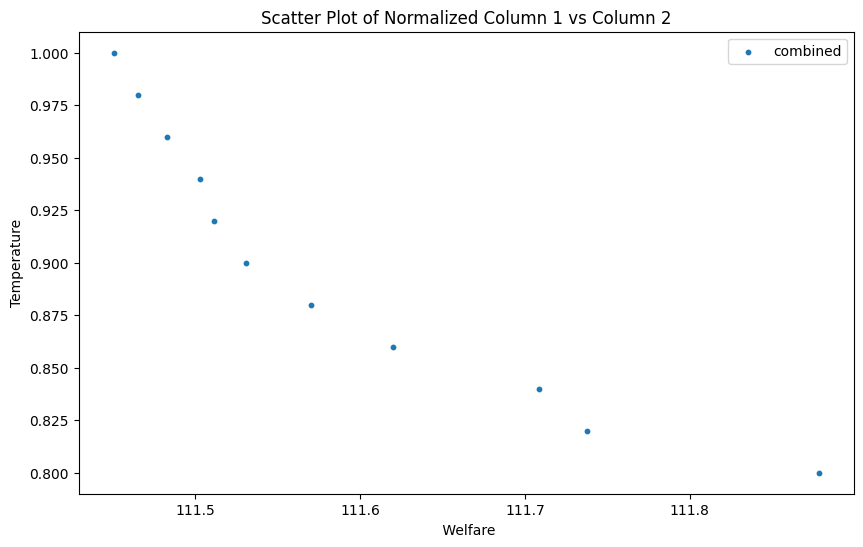

In [5]:
# Read the file 50000.csv in folder nu_50k
import matplotlib.pyplot as plt
from justice.util.enumerations import WelfareFunction, SSP
import pandas as pd



swf = WelfareFunction.UTILITARIAN
nfe = 50_000
ssp = SSP.SSP3

path1 = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
df1 = pd.read_csv(path1 + f"{swf.value[1]}_reference_set.csv")

# path2 = f"data/temporary/NU_DATA/borg/{str(ssp).split('.')[1]}/"
# df2 = pd.read_csv(path2 + f"{swf.value[1]}_reference_set.csv")

# Select only the lst 2 columns
df1 = df1.iloc[:, -2:]

# Select only the lst 2 columns
# df2 = df2.iloc[:, -2:]



# Make the size of the points larger
plt.figure(figsize=(10, 6))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], s=10, label='combined')
# plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], s=10, color='red', label='BORG')



plt.legend()

plt.xlabel(' Welfare')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Normalized Column 1 vs Column 2')
plt.show()


# Reference set to policy outcomes

In [ ]:
# Check this method out too: #NOTE ROUGH

from justice.util.output_data_processor import process_scenario

import os
import filecmp
import pandas as pd
from pathlib import Path
import multiprocessing as mp
from functools import partial
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.output_data_processor import process_scenario


if __name__ == "__main__":
    ######################################
    scenario_list = ["SSP245"]

    social_welfare_function = WelfareFunction.PRIORITARIAN
    nfe = 50_000
    ssp = SSP.SSP2

    sw_name = social_welfare_function.value[1]
    path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
    filename = f"{sw_name}_reference_set.csv"

    # Print the selected policy indices values of last 4 columns
    # Find the min and max welfare values for utilitarian and prioritarian
    loaded_df = pd.read_csv(path + filename)
    policy_indices = list(range(len(loaded_df)))

    sw_name = social_welfare_function.value[1]

    filename = f"{sw_name}_reference_set.csv"

    loaded_df = pd.read_csv(path + filename)
    print(f"Loading data for {sw_name} from {path+filename}")
    print("Selected policy‑indices last 2 columns:")
    print(loaded_df.iloc[policy_indices, -2:])

    # spawn‐based pool so that each worker is a fresh interpreter
    mp.set_start_method("spawn")
    # Bind the fixed arguments swf and policy_indices to process_scenario
    bound_process_scenario = partial(
        process_scenario, social_welfare_function, policy_indices
    )
    with mp.Pool(processes=len(scenario_list)) as pool:
        pool.map(bound_process_scenario, scenario_list)


#### Reevaluation 

###### Run nu_analysis.py - Parallelizes the process over the scenarios
###### Only after running nu_analysis.py, the data is available analysis

In [1]:
import pandas as pd
from pathlib import Path

from justice.util.enumerations import WelfareFunction, SSP
import h5py
from justice.util.output_data_processor import generate_reference_set_policy_mapping
import pandas as pd
from pathlib import Path


nfe = 50_000
ssp = SSP.SSP3



path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
# Example usage
# 1) Set up paths & scenarios
swf           = WelfareFunction.PRIORITARIAN
base_dir      = Path(path)
saving       = True

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]

mapping = generate_reference_set_policy_mapping(
    swf=swf,
    data_root=base_dir,
    scenario_list=scenario_list,
    saving=saving,
    output_directory="mapping",
    delete_loaded_files= True,  # Set to True to delete the loaded files after processing
)

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 4 policies (0 to 3)
All files loaded successfully.
Wrote mapping to data/temporary/NU_DATA/combined/SSP3/mapping/mapping_PRIORITARIAN.h5
Deleting loaded CSV files...
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP126_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP245_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP370_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP460_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP534_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1_SSP126_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1_SSP245_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1_SSP370_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1

#### Read the mapping data

In [2]:
import h5py
from pathlib import Path
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.output_data_processor import read_reference_set_policy_mapping


# Example usage

swf           = WelfareFunction.PRIORITARIAN
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# base_dir      = Path(path)


mapping = read_reference_set_policy_mapping(path, swf.value[1], mapping_subdir="mapping", hdf5_filename_template="mapping_{}.h5")
# Example to access the mapping
print(mapping[0]["SSP534"]["utilitarian_welfare"])

print(mapping[0]['fraction_above_threshold'])

[-98.13660416 -97.92886322 -98.29999179 ... -98.13745597 -98.06694069
 -98.29892333]
0.32


##### Compute 90th percentile regret

In [1]:
import h5py
from pathlib import Path
import numpy as np
import pandas as pd
from justice.util.output_data_processor import compute_p90_regret_dataframe
from justice.util.enumerations import WelfareFunction, SSP



#### Example usage

# Define parameters similar to your original code
swf = WelfareFunction.PRIORITARIAN
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

variable_of_interest = "prioritarian_welfare" #"prioritarian_welfare" #"utilitarian_welfare" #"global_temperature" # Ensure same welfare function 
direction_of_interest = "max" # Use min for global temperature, max for welfare variables

baseline_scenario = "SSP245" # Change this when working with different scenarios

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]


# Call the function to compute the p90 regret dataframe and save it
p90_delta_df = compute_p90_regret_dataframe(
    base_path=path,
    welfare_function_name=swf.value[1],
    baseline_scenario=baseline_scenario,
    scenario_list=scenario_list,
    variable_of_interest=variable_of_interest,
    direction_of_interest=direction_of_interest,
    mapping_subdir="mapping",
    hdf5_filename_template="mapping_{}.h5",
    save_df=True,  # Save CSV file
    df_output_path=None  # Will save to default location '<base_path>/p90_regret_<welfare_function_name>.csv'
)

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Saved p90 delta data to data/temporary/NU_DATA/combined/SSP2/p90_regret_PRIORITARIAN_prioritarian_welfare.csv


#### Visualize the regret metrics

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PRIORITARIAN
Policy index with minimum regret: 6


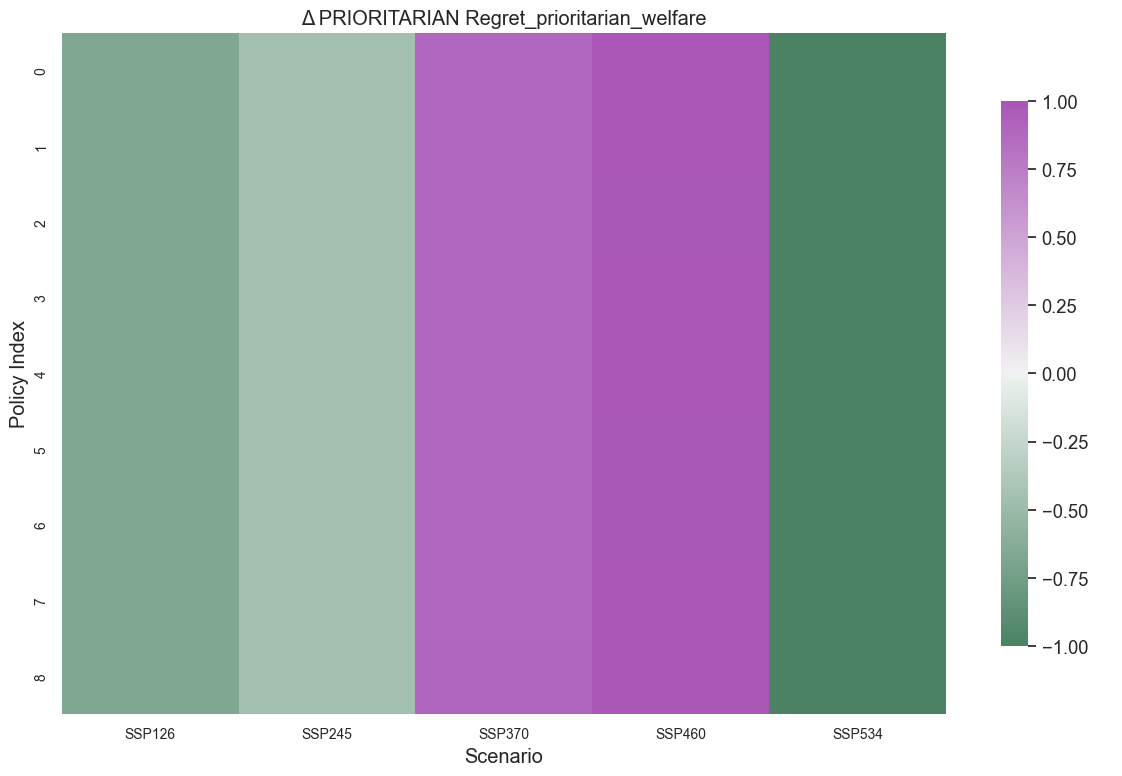

<Axes: title={'center': 'Δ PRIORITARIAN Regret_prioritarian_welfare'}, xlabel='Scenario', ylabel='Policy Index'>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from justice.util.visualizer import plot_regret_heatmap
import pandas as pd
from justice.util.output_data_processor import minimax_regret_policy
from justice.util.enumerations import WelfareFunction, SSP

# Example usage:
# Define parameters similar to your original code
swf = WelfareFunction.PRIORITARIAN
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
variable_of_interest = "prioritarian_welfare"


swf_name = swf.value[1]  # e.g., 'prioritarian' or 'utilitarian'
print(swf_name)
baseline_scenario     = "SSP245"
base_dir              = Path(path)
plot_dir              = base_dir / "plots"
plot_dir.mkdir(exist_ok=True, parents=True)

data = pd.read_csv(
    base_dir / f"p90_regret_{swf_name}_{variable_of_interest}.csv",
    index_col=0,)
name = f"Regret_{variable_of_interest}" #"Utilitarian_Temperature_Regret"


temp_idx = minimax_regret_policy(data)   
print("Policy index with minimum regret:", temp_idx)

# Suppose you have N rows and M columns.  A good rule‐of‐thumb is:
#   height = N * row_height, width = M * col_width
# e.g. row_height=0.25 inch, col_width=1 inch
n_rows, n_cols = data.shape
fig_w = n_cols * 1.0
fig_h = n_rows * 0.25

plot_regret_heatmap(
    data=data,
    figsize=(12, 8),
    font_scale=1.2,
    cmap= sns.diverging_palette(145, 300, s=60, as_cmap=True),#sns.diverging_palette(220, 20, as_cmap=True),#"vlag", #"coolwarm",
    center=0.0,
    square=True,
    cbar_label=" ",
    title=f"Δ {swf_name} {name}",
    show_values=False,           # ← turn on annotations
    fmt=".3f",                  # three decimal places
    annot_kws={"size": 8, "color": "black"},
    save_path=plot_dir / f"{swf_name}_{name}_{variable_of_interest}_diff_annotated.svg",
    xtick_labelsize=10,
    ytick_labelsize=10,
    scaling=True,               # ← scale to [-1,1]
)

#### Extract variables for selected policies
SSP2

```
    Utilitarian
                Welfare Regret    | Temperature Regret
            pi:  29               | 4
    
    Prioritarian
                Welfare Regret    | Temperature Regret
            pi:   6               | 8
```

In [ ]:
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader
from justice.util.enumerations import WelfareFunction, SSP

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]

start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1



data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon


swf = WelfareFunction.UTILITARIAN
policy_index = 4 #Put the policy index here.
ssp = SSP.SSP2

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

base_dir                = path
input_data_name = f"{swf.value[1]}_reference_set_idx{policy_index}.h5"

scenario = scenario_list[4] # Iterate manually through the scenarios and reset kernel every scenario

print(f"Processing scenario: {scenario} with policy index: {policy_index} for {swf.value[1]}")

##############################################################################

# NOTE: The following code generates large dataframes and saved them in the data/temporary folder. Size is ~ 1.5 GB each run

reevaluate_optimal_policy(
    input_data=[
        f"{swf.value[1]}_reference_set.csv",


    ],

    path_to_rbf_weights=path,  #  reevaluation
    path_to_output=path,  #  reevaluation
    direction_of_optimization=[
        "min",
        "min",
    ],
    rbf_policy_index= policy_index, #selected_indices[0], # This chooses policy for a particular rival framing. Can also set to the index directly
    list_of_objectives=[
        "welfare",
        "fraction_above_threshold",
    ],
    scenario_list= [scenario],  
)


############################################################################################################

variable_names_and_shapes = {
    "global_temperature": 2,
    "constrained_emission_control_rate": 3,
    "emissions": 3,
}
for variable_name, data_shape in variable_names_and_shapes.items():
    reevaluated_optimal_policy_variable_extractor(
        scenario_list= [scenario],  
        region_list=region_list,
        list_of_years=list_of_years,
        path_to_data=path,  
        path_to_output=path,   
        variable_name=variable_name,
        data_shape=data_shape, # 2 for temperature, 3 for rest
        no_of_ensembles=1001,
        input_data=[
            input_data_name,
        ],
        output_file_names=[
            f"{swf.value[1]}_{variable_name}",
        ],
    )



/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Processing scenario: SSP534 with policy index: 4 for UTILITARIAN
index for policy:  4
6 SSP534
Welfare:  103.68435345942848
Keys of the scenario data:  dict_keys(['SSP534'])
File saved as UTILITARIAN_reference_set_idx4 at location data/temporary/NU_DATA/combined/SSP2/
Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP534
File saved as UTILITARIAN_global_temperature_idx4_SSP534_global_temperature at location data/temporary/NU_DATA/combined/SSP2
Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP534
File saved as UTILITARIAN_constrained_emission_control_rate_idx4_SSP534_constrained_emission_control_rate at location data/temporary/NU_DATA/combined/SSP2
Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP534
File saved as UTILITARIAN_emissions_idx4_SSP534_emissions at location data/temporary/NU_DATA/combined/SSP2


In [1]:
from justice.util.visualizer import plot_comparison_with_boxplots
from justice.util.enumerations import WelfareFunction, SSP
ssp = SSP.SSP2

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

regret_type = "Temperature_Regret" # "Welfare_Regret" or "Temperature_Regret"

plot_comparison_with_boxplots(
    data_paths=[

        # Prioritarian Welfare Regret
        # path + "PRIORITARIAN_emissions_idx6_SSP126_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP370_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP460_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP534_emissions.npy",

        # Prioritarian Temperature Regret
        # path + "PRIORITARIAN_emissions_idx8_SSP126_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP245_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP370_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP460_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP534_emissions.npy",

        # Utilitarian Welfare Regret
        # path + "UTILITARIAN_emissions_idx29_SSP126_emissions.npy",
        # path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy",
        # path + "UTILITARIAN_emissions_idx29_SSP370_emissions.npy",
        # path + "UTILITARIAN_emissions_idx29_SSP460_emissions.npy",
        # path + "UTILITARIAN_emissions_idx29_SSP534_emissions.npy",

        # Utilitarian Temperature Regret
        path + "UTILITARIAN_emissions_idx4_SSP126_emissions.npy",
        path + "UTILITARIAN_emissions_idx4_SSP245_emissions.npy",
        path + "UTILITARIAN_emissions_idx4_SSP370_emissions.npy",
        path + "UTILITARIAN_emissions_idx4_SSP460_emissions.npy",
        path + "UTILITARIAN_emissions_idx4_SSP534_emissions.npy",
    
    ],
    labels=[
        
        'SSP1',
        'SSP2',
        'SSP3',
        'SSP4',
        'SSP5',
        ], 
    start_year=2015,
    end_year=2300,
    data_timestep=5,
    timestep=1,
    visualization_start_year=2015,
    visualization_end_year=2100,
    yaxis_range=[0, 80],
    plot_title=' ',
    xaxis_title='Year',
    yaxis_title='Global Emissions (GtCO2)',
    template='plotly_white',
    width=1000,
    height=700,
    output_path=path +"/"+ "plots",
    saving=True,
    show_red_dashed_line=False,
    show_interquartile_range=True,
    linecolors=[
 

        "rgba(141,211,199, 1)",
        "rgba(254,217,166, 1)", 
        "rgba(190,186,218, 1)", 
        "rgba(128,177,211, 1)", 
        "rgba(251,128,114, 1)", 
        ],
    colors = [ 

        "rgba(141,211,199, 0.4)", 
        "rgba(254,217,166, 0.4)",
        "rgba(190,186,218, 0.4)", 
        "rgba(128,177,211, 0.4)", 
        "rgba(251,128,114, 0.4)", 

        ],
    first_plot_proportion=[0, 0.75],
    second_plot_proportion=[0.85, 1],
    transpose_data=True,
    show_min_max = False,
    dtick=10,
    output_name_suffix=regret_type,
)

Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)


In [1]:
import numpy as np
import plotly.express as px

import pandas as pd

from justice.util.visualizer import plot_choropleth_2D_data

from justice.util.enumerations import WelfareFunction, SSP
ssp = SSP.SSP3

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"


fig, prior_data = plot_choropleth_2D_data(
    path_to_data=path,
    path_to_output= path + "plots", #"./data/temporary", #/rbf_dist_test
    projection= "natural earth1", 
    colourmap= px.colors.sequential.Reds,
    year_to_visualize=2050,
    input_data_path_list=[

        ### SSP2 Opt
        # UTILITARIAN Temperature Regret
        # "UTILITARIAN_constrained_emission_control_rate_idx4_SSP126_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx4_SSP245_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx4_SSP370_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx4_SSP460_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx4_SSP534_constrained_emission_control_rate.npy",

        # # UTILITARIAN Welfare Regret
        # "UTILITARIAN_constrained_emission_control_rate_idx29_SSP126_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx29_SSP245_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx29_SSP370_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx29_SSP460_constrained_emission_control_rate.npy",
        # "UTILITARIAN_constrained_emission_control_rate_idx29_SSP534_constrained_emission_control_rate.npy",

        # # PRIORITARIAN Temperature Regret
        # "PRIORITARIAN_constrained_emission_control_rate_idx8_SSP126_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx8_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx8_SSP370_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx8_SSP460_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx8_SSP534_constrained_emission_control_rate.npy",     

        # # PRIORITARIAN Welfare Regret
        # "PRIORITARIAN_constrained_emission_control_rate_idx6_SSP126_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx6_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx6_SSP370_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx6_SSP460_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_constrained_emission_control_rate_idx6_SSP534_constrained_emission_control_rate.npy",
        

        ### SSP3 Opt
        # UTILITARIAN Temperature Regret
        "UTILITARIAN_constrained_emission_control_rate_idx3_SSP126_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx3_SSP245_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx3_SSP370_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx3_SSP460_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx3_SSP534_constrained_emission_control_rate.npy",

        # UTILITARIAN Welfare Regret
        "UTILITARIAN_constrained_emission_control_rate_idx6_SSP126_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx6_SSP245_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx6_SSP370_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx6_SSP460_constrained_emission_control_rate.npy",
        "UTILITARIAN_constrained_emission_control_rate_idx6_SSP534_constrained_emission_control_rate.npy",

        # PRIORITARIAN Temperature Regret
        "PRIORITARIAN_constrained_emission_control_rate_idx2_SSP126_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx2_SSP245_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx2_SSP370_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx2_SSP460_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx2_SSP534_constrained_emission_control_rate.npy",

        # PRIORITARIAN Welfare Regret
        "PRIORITARIAN_constrained_emission_control_rate_idx1_SSP126_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx1_SSP245_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx1_SSP370_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx1_SSP460_constrained_emission_control_rate.npy",
        "PRIORITARIAN_constrained_emission_control_rate_idx1_SSP534_constrained_emission_control_rate.npy",




    ],
        
    data_label="Emission Control Rate",
    legend_label="", 
    data_normalization=True,
    saving=True,
    show_colorbar=False,
    normalized_colorbar=True,

)


Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/justice/util/visualizer.py:2645: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


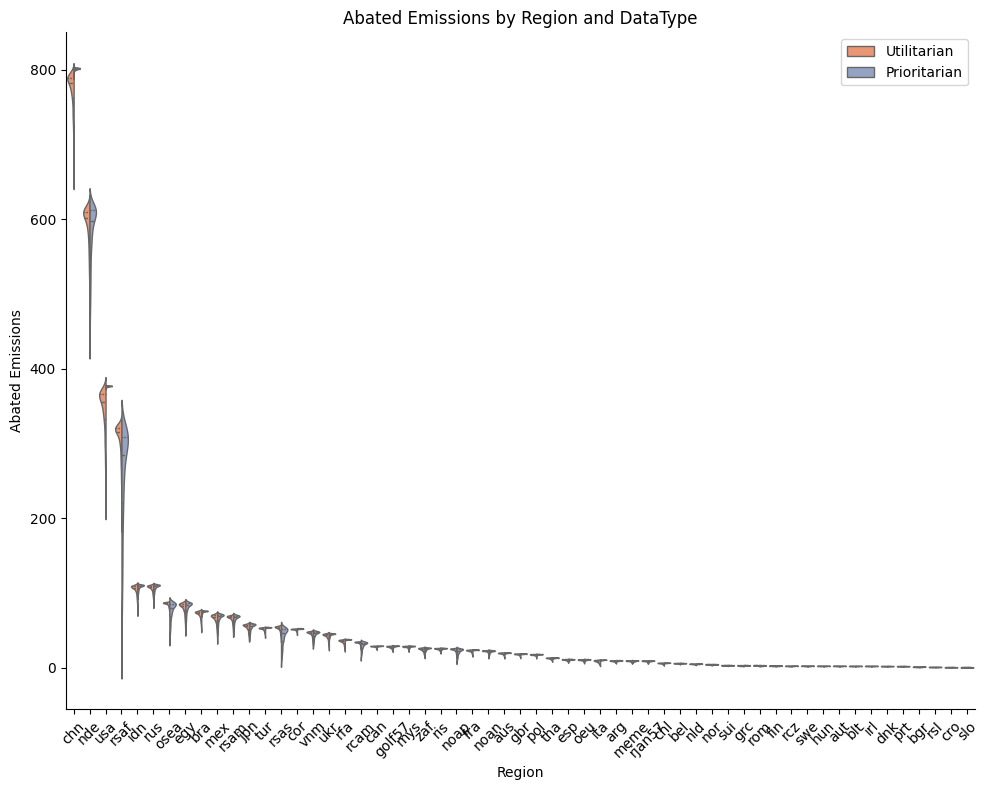

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader
import json

from justice.util.visualizer import plot_violin_comparison_sorted
from justice.util.enumerations import WelfareFunction, SSP
ssp = SSP.SSP2

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# Usage Example:
plt, economic_dataframes = plot_violin_comparison_sorted(
    baseline_path=path + "baseline_emissions_16.npy",
    utilitarian_path= path + "UTILITARIAN_emissions_idx4_SSP245_emissions.npy",
    prioritarian_path= path + "PRIORITARIAN_emissions_idx8_SSP245_emissions.npy",
    region_mapping_path="data/input/rice50_regions_dict.json",
    rice_region_dict_path="data/input/rice50_regions_dict.json",
    start_year=2015,
    end_year=2300,
    splice_start_year=2025,
    splice_end_year=2100,
    color_palette=['#fc8d62', '#8da0cb'],
    datanames=['Utilitarian', 'Prioritarian'],
    plot_title='Abated Emissions by Region and DataType',
    x_axis_title='Region',
    y_axis_title='Abated Emissions',
    path_to_output="data/plots/only_welfare_temp",
    output_file_name="abated_emissions_utilitarian_vs_prioritarian_violin_v3",
    saving=False,
)

plt.show()

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/justice/util/visualizer.py:2645: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


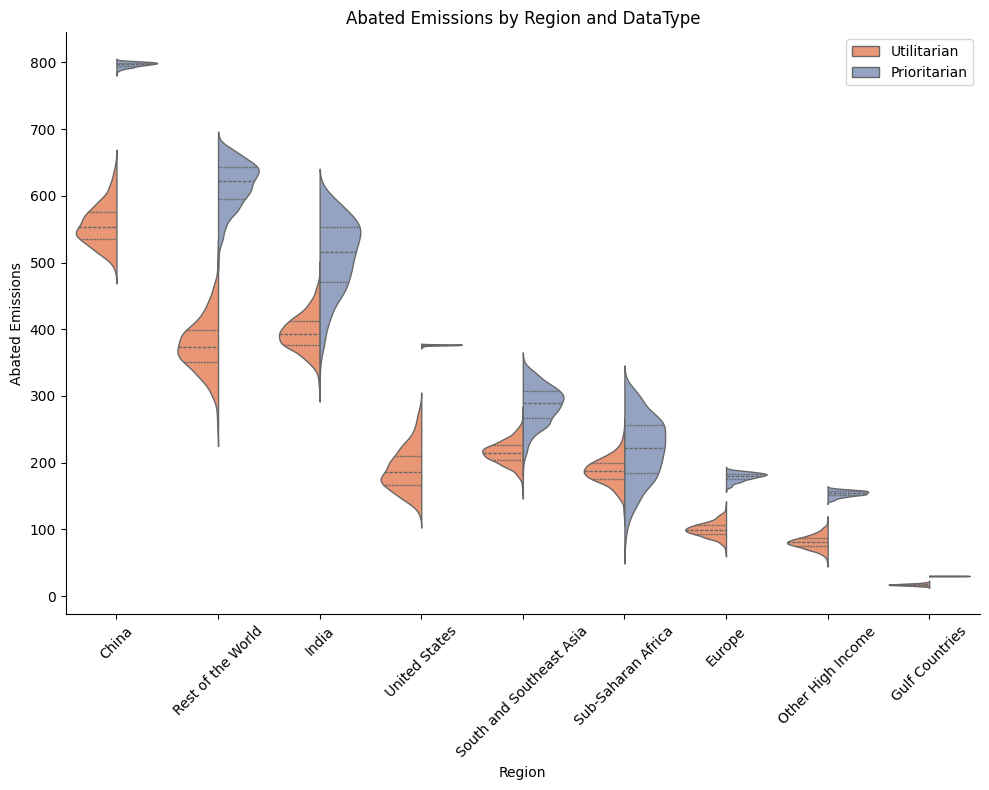

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader
import json

from justice.util.visualizer import plot_violin_comparison_sorted
from justice.util.enumerations import WelfareFunction, SSP
ssp = SSP.SSP2

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# Usage Example:
plt, economic_dataframes = plot_violin_comparison_sorted(
    baseline_path=path + "baseline_emissions_16.npy",
    utilitarian_path= path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy",
    prioritarian_path= path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy",
    region_mapping_path="data/input/9_regions.json",
    rice_region_dict_path="data/input/rice50_regions_dict.json",
    start_year=2015,
    end_year=2300,
    splice_start_year=2025,
    splice_end_year=2100,
    color_palette=['#fc8d62', '#8da0cb'],
    datanames=['Utilitarian', 'Prioritarian'],
    plot_title='Abated Emissions by Region and DataType',
    x_axis_title='Region',
    y_axis_title='Abated Emissions',
    path_to_output="data/plots/only_welfare_temp",
    output_file_name="abated_emissions_utilitarian_vs_prioritarian_violin_v3",
    saving=False,
)

plt.show()

In [2]:
first_part = economic_dataframes[0]

# SSP3


##### Regret Calculations

In [1]:
import h5py
from pathlib import Path
import numpy as np
import pandas as pd
from justice.util.output_data_processor import compute_p90_regret_dataframe
from justice.util.enumerations import WelfareFunction, SSP



#### Example usage

# Define parameters similar to your original code
swf = WelfareFunction.UTILITARIAN
ssp = SSP.SSP3
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

variable_of_interest = "global_temperature" #"prioritarian_welfare" #"utilitarian_welfare" #"global_temperature" # Ensure same welfare function 
direction_of_interest = "min" # Use min for global temperature, max for welfare variables

baseline_scenario = "SSP370" # Change this when working with different scenarios

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]


# Call the function to compute the p90 regret dataframe and save it
p90_delta_df = compute_p90_regret_dataframe(
    base_path=path,
    welfare_function_name=swf.value[1],
    baseline_scenario=baseline_scenario,
    scenario_list=scenario_list,
    variable_of_interest=variable_of_interest,
    direction_of_interest=direction_of_interest,
    mapping_subdir="mapping",
    hdf5_filename_template="mapping_{}.h5",
    save_df=True,  # Save CSV file
    df_output_path=None  # Will save to default location '<base_path>/p90_regret_<welfare_function_name>.csv'
)

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Saved p90 delta data to data/temporary/NU_DATA/combined/SSP3/p90_regret_UTILITARIAN_global_temperature.csv


#### Visualize the regret metrics

UTILITARIAN
Policy index with minimum regret: 3


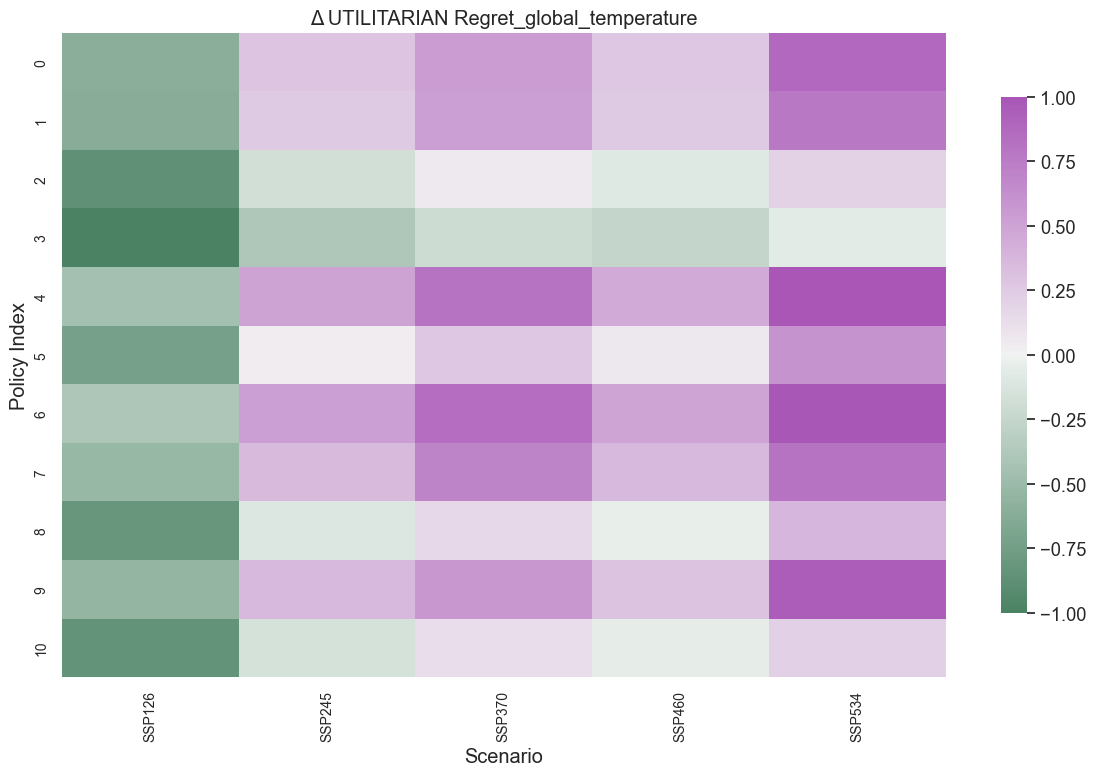

<Axes: title={'center': 'Δ UTILITARIAN Regret_global_temperature'}, xlabel='Scenario', ylabel='Policy Index'>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from justice.util.visualizer import plot_regret_heatmap
import pandas as pd
from justice.util.output_data_processor import minimax_regret_policy
from justice.util.enumerations import WelfareFunction, SSP

# Example usage:
# Define parameters similar to your original code
swf = WelfareFunction.UTILITARIAN
ssp = SSP.SSP3
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
variable_of_interest = "global_temperature" #global_temperature #utilitarian_welfare prioritarian_welfare


swf_name = swf.value[1]  # e.g., 'prioritarian' or 'utilitarian'
print(swf_name)
baseline_scenario     = "SSP370"
base_dir              = Path(path)
plot_dir              = base_dir / "plots"
plot_dir.mkdir(exist_ok=True, parents=True)

data = pd.read_csv(
    base_dir / f"p90_regret_{swf_name}_{variable_of_interest}.csv",
    index_col=0,)
name = f"Regret_{variable_of_interest}" #"Utilitarian_Temperature_Regret"


temp_idx = minimax_regret_policy(data)   
print("Policy index with minimum regret:", temp_idx)

# Suppose you have N rows and M columns.  A good rule‐of‐thumb is:
#   height = N * row_height, width = M * col_width
# e.g. row_height=0.25 inch, col_width=1 inch
n_rows, n_cols = data.shape
fig_w = n_cols * 1.0
fig_h = n_rows * 0.25

plot_regret_heatmap(
    data=data,
    figsize=(12, 8),
    font_scale=1.2,
    cmap= sns.diverging_palette(145, 300, s=60, as_cmap=True),#sns.diverging_palette(220, 20, as_cmap=True),#"vlag", #"coolwarm",
    center=0.0,
    square=True,
    cbar_label=" ",
    title=f"Δ {swf_name} {name}",
    show_values=False,           # ← turn on annotations
    fmt=".3f",                  # three decimal places
    annot_kws={"size": 8, "color": "black"},
    save_path=plot_dir / f"{swf_name}_{name}_{variable_of_interest}_diff_annotated.svg",
    xtick_labelsize=10,
    ytick_labelsize=10,
    scaling=True,               # ← scale to [-1,1]
)

#### Extract variables for selected policies
SSP3

```
    Utilitarian
                Welfare Regret    | Temperature Regret
            pi:   6               | 3
    
    Prioritarian
                Welfare Regret    | Temperature Regret
            pi:   1               | 2
```

In [2]:
from justice.util.visualizer import plot_comparison_with_boxplots
from justice.util.enumerations import WelfareFunction, SSP
ssp = SSP.SSP3

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

regret_type = "Temperature_Regret" # "Welfare_Regret" or "Temperature_Regret"

plot_comparison_with_boxplots(
    data_paths=[

        # Prioritarian Welfare Regret
        # path + "PRIORITARIAN_emissions_idx1_SSP126_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx1_SSP245_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx1_SSP370_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx1_SSP460_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx1_SSP534_emissions.npy",

        # Prioritarian Temperature Regret
        path + "PRIORITARIAN_emissions_idx2_SSP126_emissions.npy",
        path + "PRIORITARIAN_emissions_idx2_SSP245_emissions.npy",
        path + "PRIORITARIAN_emissions_idx2_SSP370_emissions.npy",
        path + "PRIORITARIAN_emissions_idx2_SSP460_emissions.npy",
        path + "PRIORITARIAN_emissions_idx2_SSP534_emissions.npy",

        # Utilitarian Welfare Regret
        # path + "UTILITARIAN_emissions_idx6_SSP126_emissions.npy",
        # path + "UTILITARIAN_emissions_idx6_SSP245_emissions.npy",
        # path + "UTILITARIAN_emissions_idx6_SSP370_emissions.npy",
        # path + "UTILITARIAN_emissions_idx6_SSP460_emissions.npy",
        # path + "UTILITARIAN_emissions_idx6_SSP534_emissions.npy",

        # Utilitarian Temperature Regret
        # path + "UTILITARIAN_emissions_idx3_SSP126_emissions.npy",
        # path + "UTILITARIAN_emissions_idx3_SSP245_emissions.npy",
        # path + "UTILITARIAN_emissions_idx3_SSP370_emissions.npy",
        # path + "UTILITARIAN_emissions_idx3_SSP460_emissions.npy",
        # path + "UTILITARIAN_emissions_idx3_SSP534_emissions.npy",
    
    ],
    labels=[
        
        'SSP1',
        'SSP2',
        'SSP3',
        'SSP4',
        'SSP5',
        ], 
    start_year=2015,
    end_year=2300,
    data_timestep=5,
    timestep=1,
    visualization_start_year=2015,
    visualization_end_year=2100,
    yaxis_range=[0, 80],
    plot_title=' ',
    xaxis_title='Year',
    yaxis_title='Global Emissions (GtCO2)',
    template='plotly_white',
    width=1000,
    height=700,
    output_path=path +"/"+ "plots",
    saving=True,
    show_red_dashed_line=False,
    show_interquartile_range=True,
    linecolors=[
 

        "rgba(141,211,199, 1)",
        "rgba(254,217,166, 1)", 
        "rgba(190,186,218, 1)", 
        "rgba(128,177,211, 1)", 
        "rgba(251,128,114, 1)", 
        ],
    colors = [ 

        "rgba(141,211,199, 0.4)", 
        "rgba(254,217,166, 0.4)",
        "rgba(190,186,218, 0.4)", 
        "rgba(128,177,211, 0.4)", 
        "rgba(251,128,114, 0.4)", 

        ],
    first_plot_proportion=[0, 0.75],
    second_plot_proportion=[0.85, 1],
    transpose_data=True,
    show_min_max = False,
    dtick=10,
    output_name_suffix=regret_type,
)

Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)


/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/justice/util/visualizer.py:2645: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


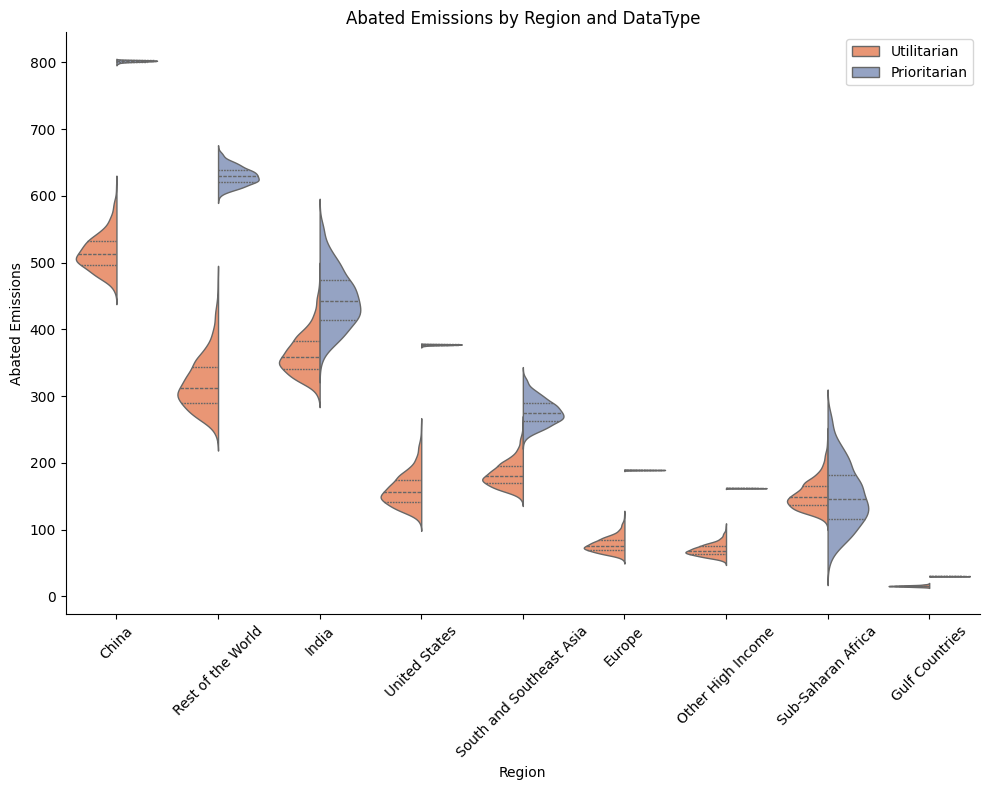

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader
import json

from justice.util.visualizer import plot_violin_comparison_sorted
from justice.util.enumerations import WelfareFunction, SSP
ssp = SSP.SSP3

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# Usage Example:
plt, economic_dataframes = plot_violin_comparison_sorted(
    baseline_path=path + "baseline_emissions_16.npy", #NOTE: Need Different baseline emissions - this is for SSP2
    utilitarian_path= path + "UTILITARIAN_emissions_idx6_SSP245_emissions.npy",
    prioritarian_path= path + "PRIORITARIAN_emissions_idx1_SSP245_emissions.npy",
    region_mapping_path="data/input/9_regions.json",
    rice_region_dict_path="data/input/rice50_regions_dict.json",
    start_year=2015,
    end_year=2300,
    splice_start_year=2025,
    splice_end_year=2100,
    color_palette=['#fc8d62', '#8da0cb'],
    datanames=['Utilitarian', 'Prioritarian'],
    plot_title='Abated Emissions by Region and DataType',
    x_axis_title='Region',
    y_axis_title='Abated Emissions',
    path_to_output= path + "plots",
    output_file_name="abated_emissions_utilitarian_vs_prioritarian_violin_v3",
    saving=False,
)

plt.show()

In [ ]:
# Convert economic dataframes to pandas DataFrames
economic_dataframes = pd.concat(economic_dataframes, axis=1)

# Split the economic dataframes into two separate DataFrames 9 columns each
utilitarian_df = economic_dataframes.iloc[:, :9]
prioritarian_df = economic_dataframes.iloc[:, 9:]

# Rows contain the 1001 samples, columns contain the 9 regions


/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_88271/3167441782.py:107: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_88271/3167441782.py:117: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


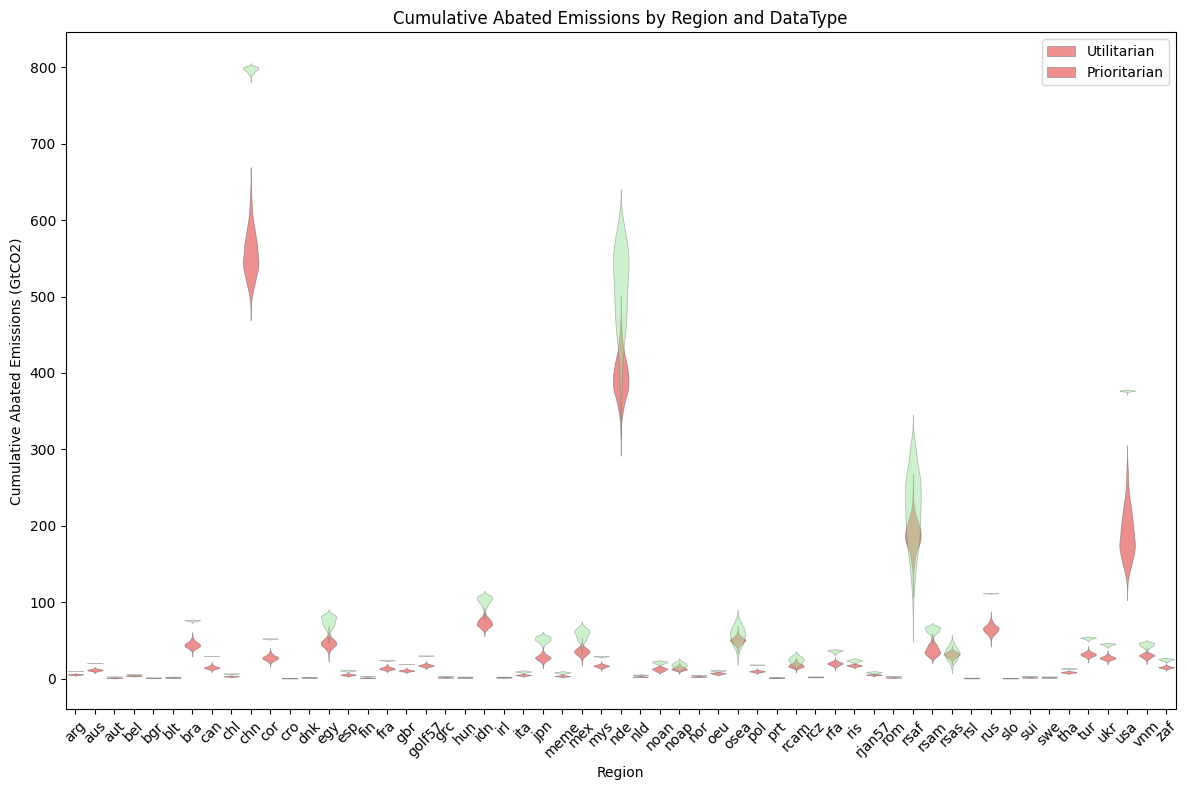

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from justice.util.enumerations import WelfareFunction, SSP

from justice.util.data_loader import DataLoader
from justice.util.model_time import TimeHorizon
from pandas.api.types import CategoricalDtype

data_loader = DataLoader()
region_list = data_loader.REGION_LIST
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon


ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

slice_start_year = time_horizon.year_to_timestep(2025, time_horizon.timestep)
slice_end_year = time_horizon.year_to_timestep(2100, time_horizon.timestep)

# Load the data
baseline_emissions = np.load(path + "baseline_emissions_16.npy")
utilitarian_emissions_SSP2 = np.load(path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy")
prioritarian_emissions_SSP2 = np.load(path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy")

abated_utilitarian_emissions_SSP2 = baseline_emissions - utilitarian_emissions_SSP2
abated_prioritarian_emissions_SSP2 = baseline_emissions - prioritarian_emissions_SSP2

# Slice the data for the years 2025 to 2100
abated_utilitarian_emissions_SSP2 = abated_utilitarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]
abated_prioritarian_emissions_SSP2 = abated_prioritarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]

# Cumulative abated emissions over the years - sum across the time dimension to collapse it
cumulative_abated_utilitarian_emissions_SSP2 = np.sum(abated_utilitarian_emissions_SSP2, axis=1)
cumulative_abated_prioritarian_emissions_SSP2 = np.sum(abated_prioritarian_emissions_SSP2, axis=1)

# Cumulative abated emissions is of shape (57, 1001) where 57 is the number of regions and 1001 is the number of samples
# Add the region names as the index
cumulative_abated_utilitarian_emissions_df = pd.DataFrame(
    cumulative_abated_utilitarian_emissions_SSP2,
    index=region_list,

)

cumulative_abated_prioritarian_emissions_df = pd.DataFrame(
    cumulative_abated_prioritarian_emissions_SSP2,
    index=region_list,
)

# Instead of having regions, create one column called 'Region' and in the rows repeat the region names for each sample
cumulative_abated_utilitarian_emissions_df = cumulative_abated_utilitarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_utilitarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)    # This will create a new column called 'Sample' with the index values

cumulative_abated_prioritarian_emissions_df = cumulative_abated_prioritarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_prioritarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)    # This will create a new column called 'Sample' with the index values

# Drop the region column from the DataFrame
cumulative_abated_utilitarian_emissions_df.drop(columns=['Region'], inplace=True)
cumulative_abated_prioritarian_emissions_df.drop(columns=['Region'], inplace=True)

# Rename the columns 
cumulative_abated_utilitarian_emissions_df.rename(
    columns={'Sample': 'Sample Utilitarian', 'Cumulative Abated Emissions': 'Utilitarian Cumulative Abated Emissions'}, inplace=True
)
cumulative_abated_prioritarian_emissions_df.rename(
    columns={'Sample': 'Sample Prioritarian', 'Cumulative Abated Emissions': 'Prioritarian Cumulative Abated Emissions'}, inplace=True
)

# Create a new DataFrame that combines both utilitarian and prioritarian ensuring the rows of the new DataFrame are the same as the original DataFrame

# Convert region_list to a categorical type with a specific order
region_order = CategoricalDtype(categories=region_list, ordered=True)

# Cumulative abated emissions DataFrame are of shape 57057,2 each. Combine them into one DataFrame so that the shape is (57057, 4)
cumulative_abated_emissions_df = pd.concat(
    [cumulative_abated_utilitarian_emissions_df, cumulative_abated_prioritarian_emissions_df],
    axis=1
)


cumulative_abated_emissions_df['Sample Prioritarian'] = cumulative_abated_emissions_df['Sample Prioritarian'].astype(region_order)

# Use sns to create a ridge plot of the cumulative abated emissions for utilitarian and prioritarian
plt.figure(figsize=(12, 8))
sns.violinplot(
    x='Sample Utilitarian',
    y='Utilitarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    inner=None,
    color='red',
    linewidth=0.5,
    scale='width',
    alpha=0.5
)
sns.violinplot(
    x='Sample Prioritarian',
    y='Prioritarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    inner=None,
    color='lightgreen',
    linewidth=0.5,
    scale='width',
    alpha=0.5
)
plt.title('Cumulative Abated Emissions by Region and DataType')
plt.xlabel('Region')
plt.ylabel('Cumulative Abated Emissions (GtCO2)')
plt.xticks(rotation=45)
plt.legend(['Utilitarian', 'Prioritarian'], loc='upper right')
plt.tight_layout()

plt.show()

/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_88271/1996391974.py:111: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_88271/1996391974.py:122: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



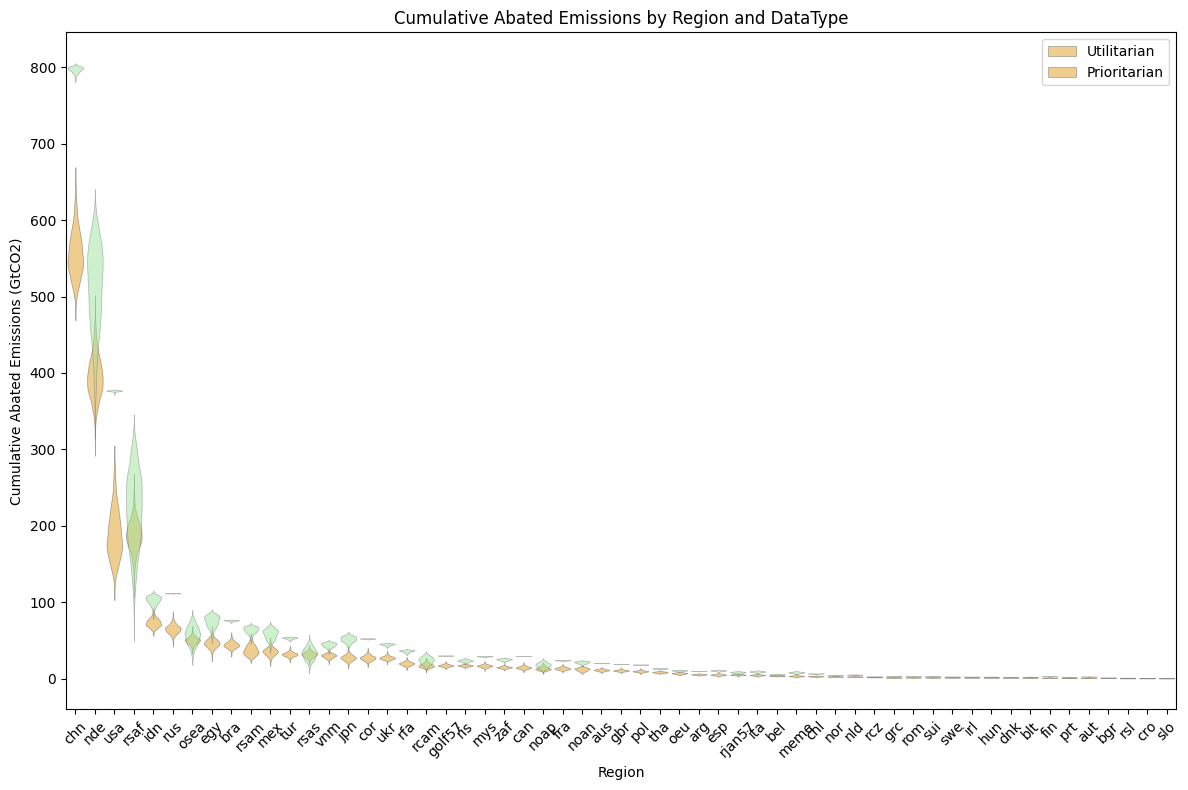

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from justice.util.enumerations import WelfareFunction, SSP

from justice.util.data_loader import DataLoader
from justice.util.model_time import TimeHorizon
from pandas.api.types import CategoricalDtype

data_loader = DataLoader()
region_list = data_loader.REGION_LIST
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon

ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

slice_start_year = time_horizon.year_to_timestep(2025, time_horizon.timestep)
slice_end_year = time_horizon.year_to_timestep(2100, time_horizon.timestep)

# Load the data
baseline_emissions = np.load(path + "baseline_emissions_16.npy")
utilitarian_emissions_SSP2 = np.load(path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy")
prioritarian_emissions_SSP2 = np.load(path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy")

abated_utilitarian_emissions_SSP2 = baseline_emissions - utilitarian_emissions_SSP2
abated_prioritarian_emissions_SSP2 = baseline_emissions - prioritarian_emissions_SSP2

# Slice the data for the years 2025 to 2100
abated_utilitarian_emissions_SSP2 = abated_utilitarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]
abated_prioritarian_emissions_SSP2 = abated_prioritarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]

# Cumulative abated emissions over the years - sum across the time dimension to collapse it
cumulative_abated_utilitarian_emissions_SSP2 = np.sum(abated_utilitarian_emissions_SSP2, axis=1)
cumulative_abated_prioritarian_emissions_SSP2 = np.sum(abated_prioritarian_emissions_SSP2, axis=1)

# Cumulative abated emissions is of shape (57, 1001) where 57 is the number of regions and 1001 is the number of samples
# Add the region names as the index
cumulative_abated_utilitarian_emissions_df = pd.DataFrame(
    cumulative_abated_utilitarian_emissions_SSP2,
    index=region_list,

)

cumulative_abated_prioritarian_emissions_df = pd.DataFrame(
    cumulative_abated_prioritarian_emissions_SSP2,
    index=region_list,
)

# Instead of having regions, create one column called 'Region' and in the rows repeat the region names for each sample
cumulative_abated_utilitarian_emissions_df = cumulative_abated_utilitarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_utilitarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)    # This will create a new column called 'Sample' with the index values

cumulative_abated_prioritarian_emissions_df = cumulative_abated_prioritarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_prioritarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)    # This will create a new column called 'Sample' with the index values

# Drop the region column from the DataFrame
cumulative_abated_utilitarian_emissions_df.drop(columns=['Region'], inplace=True)
cumulative_abated_prioritarian_emissions_df.drop(columns=['Region'], inplace=True)

# Rename the columns 
cumulative_abated_utilitarian_emissions_df.rename(
    columns={'Sample': 'Sample Utilitarian', 'Cumulative Abated Emissions': 'Utilitarian Cumulative Abated Emissions'}, inplace=True
)
cumulative_abated_prioritarian_emissions_df.rename(
    columns={'Sample': 'Sample Prioritarian', 'Cumulative Abated Emissions': 'Prioritarian Cumulative Abated Emissions'}, inplace=True
)

# Create a new DataFrame that combines both utilitarian and prioritarian ensuring the rows of the new DataFrame are the same as the original DataFrame

# Convert region_list to a categorical type with a specific order
region_order = CategoricalDtype(categories=region_list, ordered=True)

# Cumulative abated emissions DataFrame are of shape 57057,2 each. Combine them into one DataFrame so that the shape is (57057, 4)
cumulative_abated_emissions_df = pd.concat(
    [cumulative_abated_utilitarian_emissions_df, cumulative_abated_prioritarian_emissions_df],
    axis=1
)

cumulative_abated_emissions_df['Sample Prioritarian'] = cumulative_abated_emissions_df['Sample Prioritarian'].astype(region_order)

# -------------------------------------------------------
# SORTING LOGIC: By highest to lowest mean utilitarian abated emissions (change if needed)
utilitarian_means = cumulative_abated_emissions_df.groupby('Sample Utilitarian')['Utilitarian Cumulative Abated Emissions'].mean()
sorted_region_list = utilitarian_means.sort_values(ascending=False).index.tolist()
# -------------------------------------------------------

# Use sns to create a violin plot of the cumulative abated emissions for utilitarian and prioritarian, with sorted regions
plt.figure(figsize=(12, 8))
sns.violinplot(
    x='Sample Utilitarian',
    y='Utilitarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    order=sorted_region_list,
    inner=None,
    color='orange',
    linewidth=0.5,
    scale='width',
    alpha=0.5
)
sns.violinplot(
    x='Sample Prioritarian',
    y='Prioritarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    order=sorted_region_list,
    inner=None,
    color='lightgreen',
    linewidth=0.5,
    scale='width',
    alpha=0.5
)
plt.title('Cumulative Abated Emissions by Region and DataType')
plt.xlabel('Region')
plt.ylabel('Cumulative Abated Emissions (GtCO2)')
plt.xticks(rotation=45)
plt.legend(['Utilitarian', 'Prioritarian'], loc='upper right')
plt.tight_layout()

plt.show()

/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_88271/3071589123.py:120: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_88271/3071589123.py:133: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



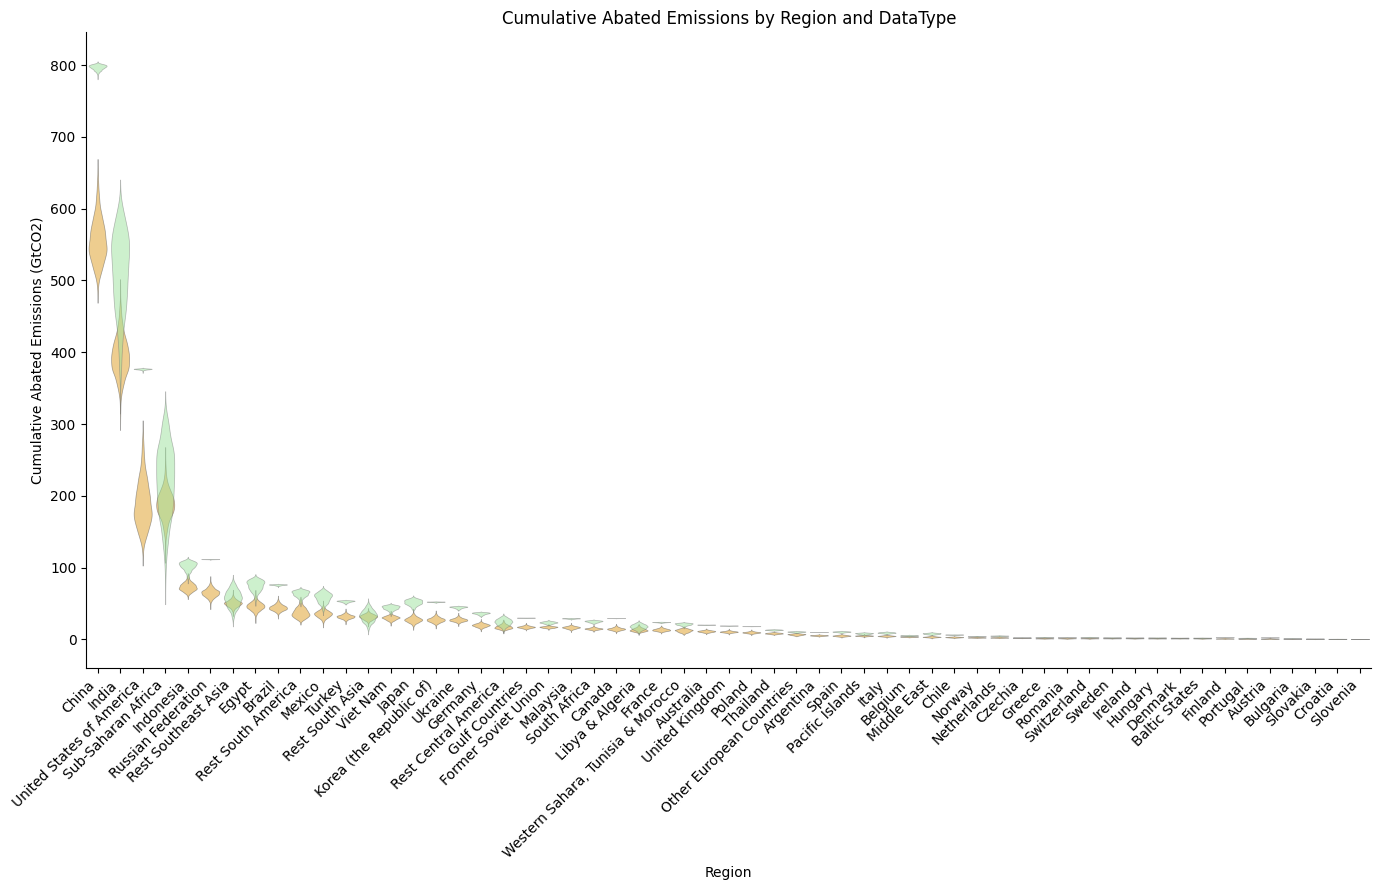

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.data_loader import DataLoader
from justice.util.model_time import TimeHorizon
from pandas.api.types import CategoricalDtype

data_loader = DataLoader()
region_list = data_loader.REGION_LIST
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon

ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

slice_start_year = time_horizon.year_to_timestep(2025, time_horizon.timestep)
slice_end_year = time_horizon.year_to_timestep(2100, time_horizon.timestep)

# Load the data
baseline_emissions = np.load(path + "baseline_emissions_16.npy")
utilitarian_emissions_SSP2 = np.load(path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy")
prioritarian_emissions_SSP2 = np.load(path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy")

abated_utilitarian_emissions_SSP2 = baseline_emissions - utilitarian_emissions_SSP2
abated_prioritarian_emissions_SSP2 = baseline_emissions - prioritarian_emissions_SSP2

# Slice the data for the years 2025 to 2100
abated_utilitarian_emissions_SSP2 = abated_utilitarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]
abated_prioritarian_emissions_SSP2 = abated_prioritarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]

# Cumulative abated emissions over the years - sum across the time dimension to collapse it
cumulative_abated_utilitarian_emissions_SSP2 = np.sum(abated_utilitarian_emissions_SSP2, axis=1)
cumulative_abated_prioritarian_emissions_SSP2 = np.sum(abated_prioritarian_emissions_SSP2, axis=1)

# Add the region names as the index
cumulative_abated_utilitarian_emissions_df = pd.DataFrame(
    cumulative_abated_utilitarian_emissions_SSP2,
    index=region_list,
)

cumulative_abated_prioritarian_emissions_df = pd.DataFrame(
    cumulative_abated_prioritarian_emissions_SSP2,
    index=region_list,
)

# Reshape to long format
cumulative_abated_utilitarian_emissions_df = cumulative_abated_utilitarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_utilitarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)

cumulative_abated_prioritarian_emissions_df = cumulative_abated_prioritarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_prioritarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)

# Drop the region column from the DataFrame
cumulative_abated_utilitarian_emissions_df.drop(columns=['Region'], inplace=True)
cumulative_abated_prioritarian_emissions_df.drop(columns=['Region'], inplace=True)

# Rename the columns 
cumulative_abated_utilitarian_emissions_df.rename(
    columns={'Sample': 'Sample Utilitarian', 'Cumulative Abated Emissions': 'Utilitarian Cumulative Abated Emissions'}, inplace=True
)
cumulative_abated_prioritarian_emissions_df.rename(
    columns={'Sample': 'Sample Prioritarian', 'Cumulative Abated Emissions': 'Prioritarian Cumulative Abated Emissions'}, inplace=True
)

# Combine into one DataFrame
cumulative_abated_emissions_df = pd.concat(
    [cumulative_abated_utilitarian_emissions_df, cumulative_abated_prioritarian_emissions_df],
    axis=1
)

# -------------------------------------------------------
# ADD: Load region name mapping
# ADD: Load region name mapping
with open('data/input/rice50_region_names.json', 'r') as f:
    region_name_map = json.load(f)

# Helper to get readable region name (handles list or string)
def get_region_name(code):
    name = region_name_map.get(code, code)
    if isinstance(name, list):
        return name[0]
    return name

# Sorting: By highest to lowest mean utilitarian abated emissions (region codes, as before)
utilitarian_means = cumulative_abated_emissions_df.groupby('Sample Utilitarian')['Utilitarian Cumulative Abated Emissions'].mean()
sorted_region_list = utilitarian_means.sort_values(ascending=False).index.tolist()

# Map sorted region codes to region names
sorted_region_names = [get_region_name(code) for code in sorted_region_list]
# Map the DataFrame region codes to names for plotting
cumulative_abated_emissions_df['Region Utilitarian Name'] = cumulative_abated_emissions_df['Sample Utilitarian'].map(get_region_name)
cumulative_abated_emissions_df['Region Prioritarian Name'] = cumulative_abated_emissions_df['Sample Prioritarian'].map(get_region_name)
# -------------------------------------------------------

# Plot: x is region names, sorted by mean utilitarian abated emissions
plt.figure(figsize=(14, 9))
sns.violinplot(
    x='Region Utilitarian Name',
    y='Utilitarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    order=sorted_region_names,
    inner=None,
    color='orange',
    linewidth=0.5,
    scale='width',
    alpha=0.5,
    # fill=False,  # Do not fill the violins
    # split=True,  # Split the violins for better visibility
)
sns.violinplot(
    x='Region Prioritarian Name',
    y='Prioritarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    order=sorted_region_names,
    inner=None,
    color='lightgreen',
    linewidth=0.5,
    scale='width',
    alpha=0.5,
    # fill=False,  # Do not fill the violins
    
    # split=True,  # Split the violins for better visibility
    
)


    
plt.title('Cumulative Abated Emissions by Region and DataType')
plt.xlabel('Region')
plt.ylabel('Cumulative Abated Emissions (GtCO2)')
plt.xticks(rotation=45, ha="right")
# plt.legend(['Utilitarian', 'Prioritarian'], loc='upper right')
plt.tight_layout()

# Get rid of top and right spines
sns.despine()



plt.show()

/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_30853/4052355106.py:125: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_30853/4052355106.py:136: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


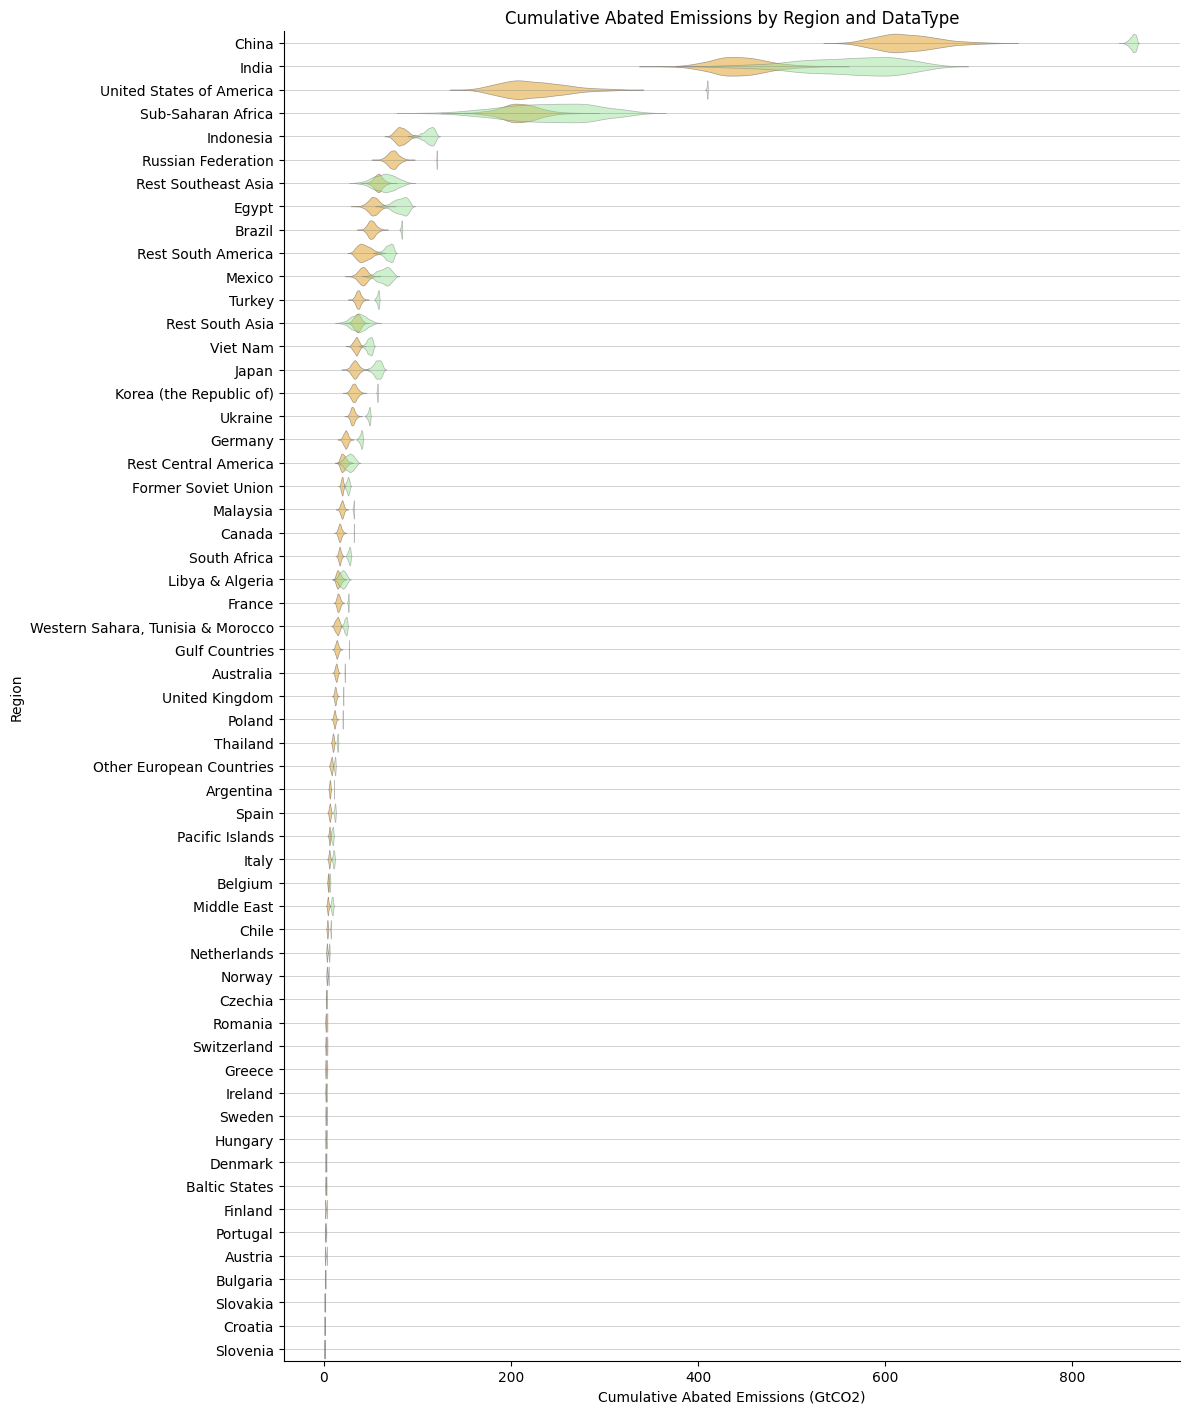

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.data_loader import DataLoader
from justice.util.model_time import TimeHorizon
from pandas.api.types import CategoricalDtype

data_loader = DataLoader()
region_list = data_loader.REGION_LIST
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon

ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

slice_start_year = time_horizon.year_to_timestep(2025, time_horizon.timestep)
slice_end_year = time_horizon.year_to_timestep(2100, time_horizon.timestep)

# Load the data
# baseline_emissions = np.load(path + "baseline_emissions_16.npy")
emissions_all_SSPs = np.load(path + "emissions_array_all_SSPs.npy")
utilitarian_emissions_SSP2 = np.load(path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy")
prioritarian_emissions_SSP2 = np.load(path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy")


# Get SSP2 emissions from the emissions_all_SSPs array
baseline_emissions_SSP2 = emissions_all_SSPs[:, :, 1]  # SSP2 is at index 1
# Convert baseline emissions to a 3D array with shape (1001, 16, 1)
baseline_emissions_SSP2 = np.expand_dims(baseline_emissions_SSP2, axis=-1)
abated_utilitarian_emissions_SSP2 = baseline_emissions_SSP2 - utilitarian_emissions_SSP2
abated_prioritarian_emissions_SSP2 = baseline_emissions_SSP2 - prioritarian_emissions_SSP2

# Slice the data for the years 2025 to 2100
abated_utilitarian_emissions_SSP2 = abated_utilitarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]
abated_prioritarian_emissions_SSP2 = abated_prioritarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]

# Cumulative abated emissions over the years - sum across the time dimension to collapse it
cumulative_abated_utilitarian_emissions_SSP2 = np.sum(abated_utilitarian_emissions_SSP2, axis=1)
cumulative_abated_prioritarian_emissions_SSP2 = np.sum(abated_prioritarian_emissions_SSP2, axis=1)

# Add the region names as the index
cumulative_abated_utilitarian_emissions_df = pd.DataFrame(
    cumulative_abated_utilitarian_emissions_SSP2,
    index=region_list,
)

cumulative_abated_prioritarian_emissions_df = pd.DataFrame(
    cumulative_abated_prioritarian_emissions_SSP2,
    index=region_list,
)

# Reshape to long format
cumulative_abated_utilitarian_emissions_df = cumulative_abated_utilitarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_utilitarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)

cumulative_abated_prioritarian_emissions_df = cumulative_abated_prioritarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_prioritarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)

# Drop the region column from the DataFrame
cumulative_abated_utilitarian_emissions_df.drop(columns=['Region'], inplace=True)
cumulative_abated_prioritarian_emissions_df.drop(columns=['Region'], inplace=True)

# Rename the columns 
cumulative_abated_utilitarian_emissions_df.rename(
    columns={'Sample': 'Sample Utilitarian', 'Cumulative Abated Emissions': 'Utilitarian Cumulative Abated Emissions'}, inplace=True
)
cumulative_abated_prioritarian_emissions_df.rename(
    columns={'Sample': 'Sample Prioritarian', 'Cumulative Abated Emissions': 'Prioritarian Cumulative Abated Emissions'}, inplace=True
)

# Combine into one DataFrame
cumulative_abated_emissions_df = pd.concat(
    [cumulative_abated_utilitarian_emissions_df, cumulative_abated_prioritarian_emissions_df],
    axis=1
)

# -------------------------------------------------------
# Load region name mapping
with open('data/input/rice50_region_names.json', 'r') as f:
    region_name_map = json.load(f)

# Helper to get readable region name (handles list or string)
def get_region_name(code):
    name = region_name_map.get(code, code)
    if isinstance(name, list):
        return name[0]
    return name

# Sorting: By highest to lowest mean utilitarian abated emissions (region codes, as before)
utilitarian_means = cumulative_abated_emissions_df.groupby('Sample Utilitarian')['Utilitarian Cumulative Abated Emissions'].mean()
sorted_region_list = utilitarian_means.sort_values(ascending=False).index.tolist()

# Map sorted region codes to region names
sorted_region_names = [get_region_name(code) for code in sorted_region_list]
# Map the DataFrame region codes to names for plotting
cumulative_abated_emissions_df['Region Utilitarian Name'] = cumulative_abated_emissions_df['Sample Utilitarian'].map(get_region_name)
cumulative_abated_emissions_df['Region Prioritarian Name'] = cumulative_abated_emissions_df['Sample Prioritarian'].map(get_region_name)
# -------------------------------------------------------

# ----- Horizontal Violin Plot -----
plt.figure(figsize=(12, max(8, 0.25*len(sorted_region_names))))
sns.violinplot(
    y='Region Utilitarian Name',
    x='Utilitarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    order=sorted_region_names,
    inner=None,
    color='orange',
    linewidth=0.5,
    scale='width',
    alpha=0.5,
)
sns.violinplot(
    y='Region Prioritarian Name',
    x='Prioritarian Cumulative Abated Emissions',
    data=cumulative_abated_emissions_df,
    order=sorted_region_names,
    inner=None,
    color='lightgreen',
    linewidth=0.5,
    scale='width',
    alpha=0.5,
    # split=True,  # Split the violins for better visibility
)

# Add lines for each region to separate the violins
for region in sorted_region_names:
    plt.axhline(y=region, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

    
plt.title('Cumulative Abated Emissions by Region and DataType')
plt.ylabel('Region')
plt.xlabel('Cumulative Abated Emissions (GtCO2)')
plt.yticks(rotation=0)
# plt.legend(['Utilitarian', 'Prioritarian'], loc='lower right')
plt.tight_layout()
sns.despine()
plt.show()

/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_30853/136114444.py:94: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


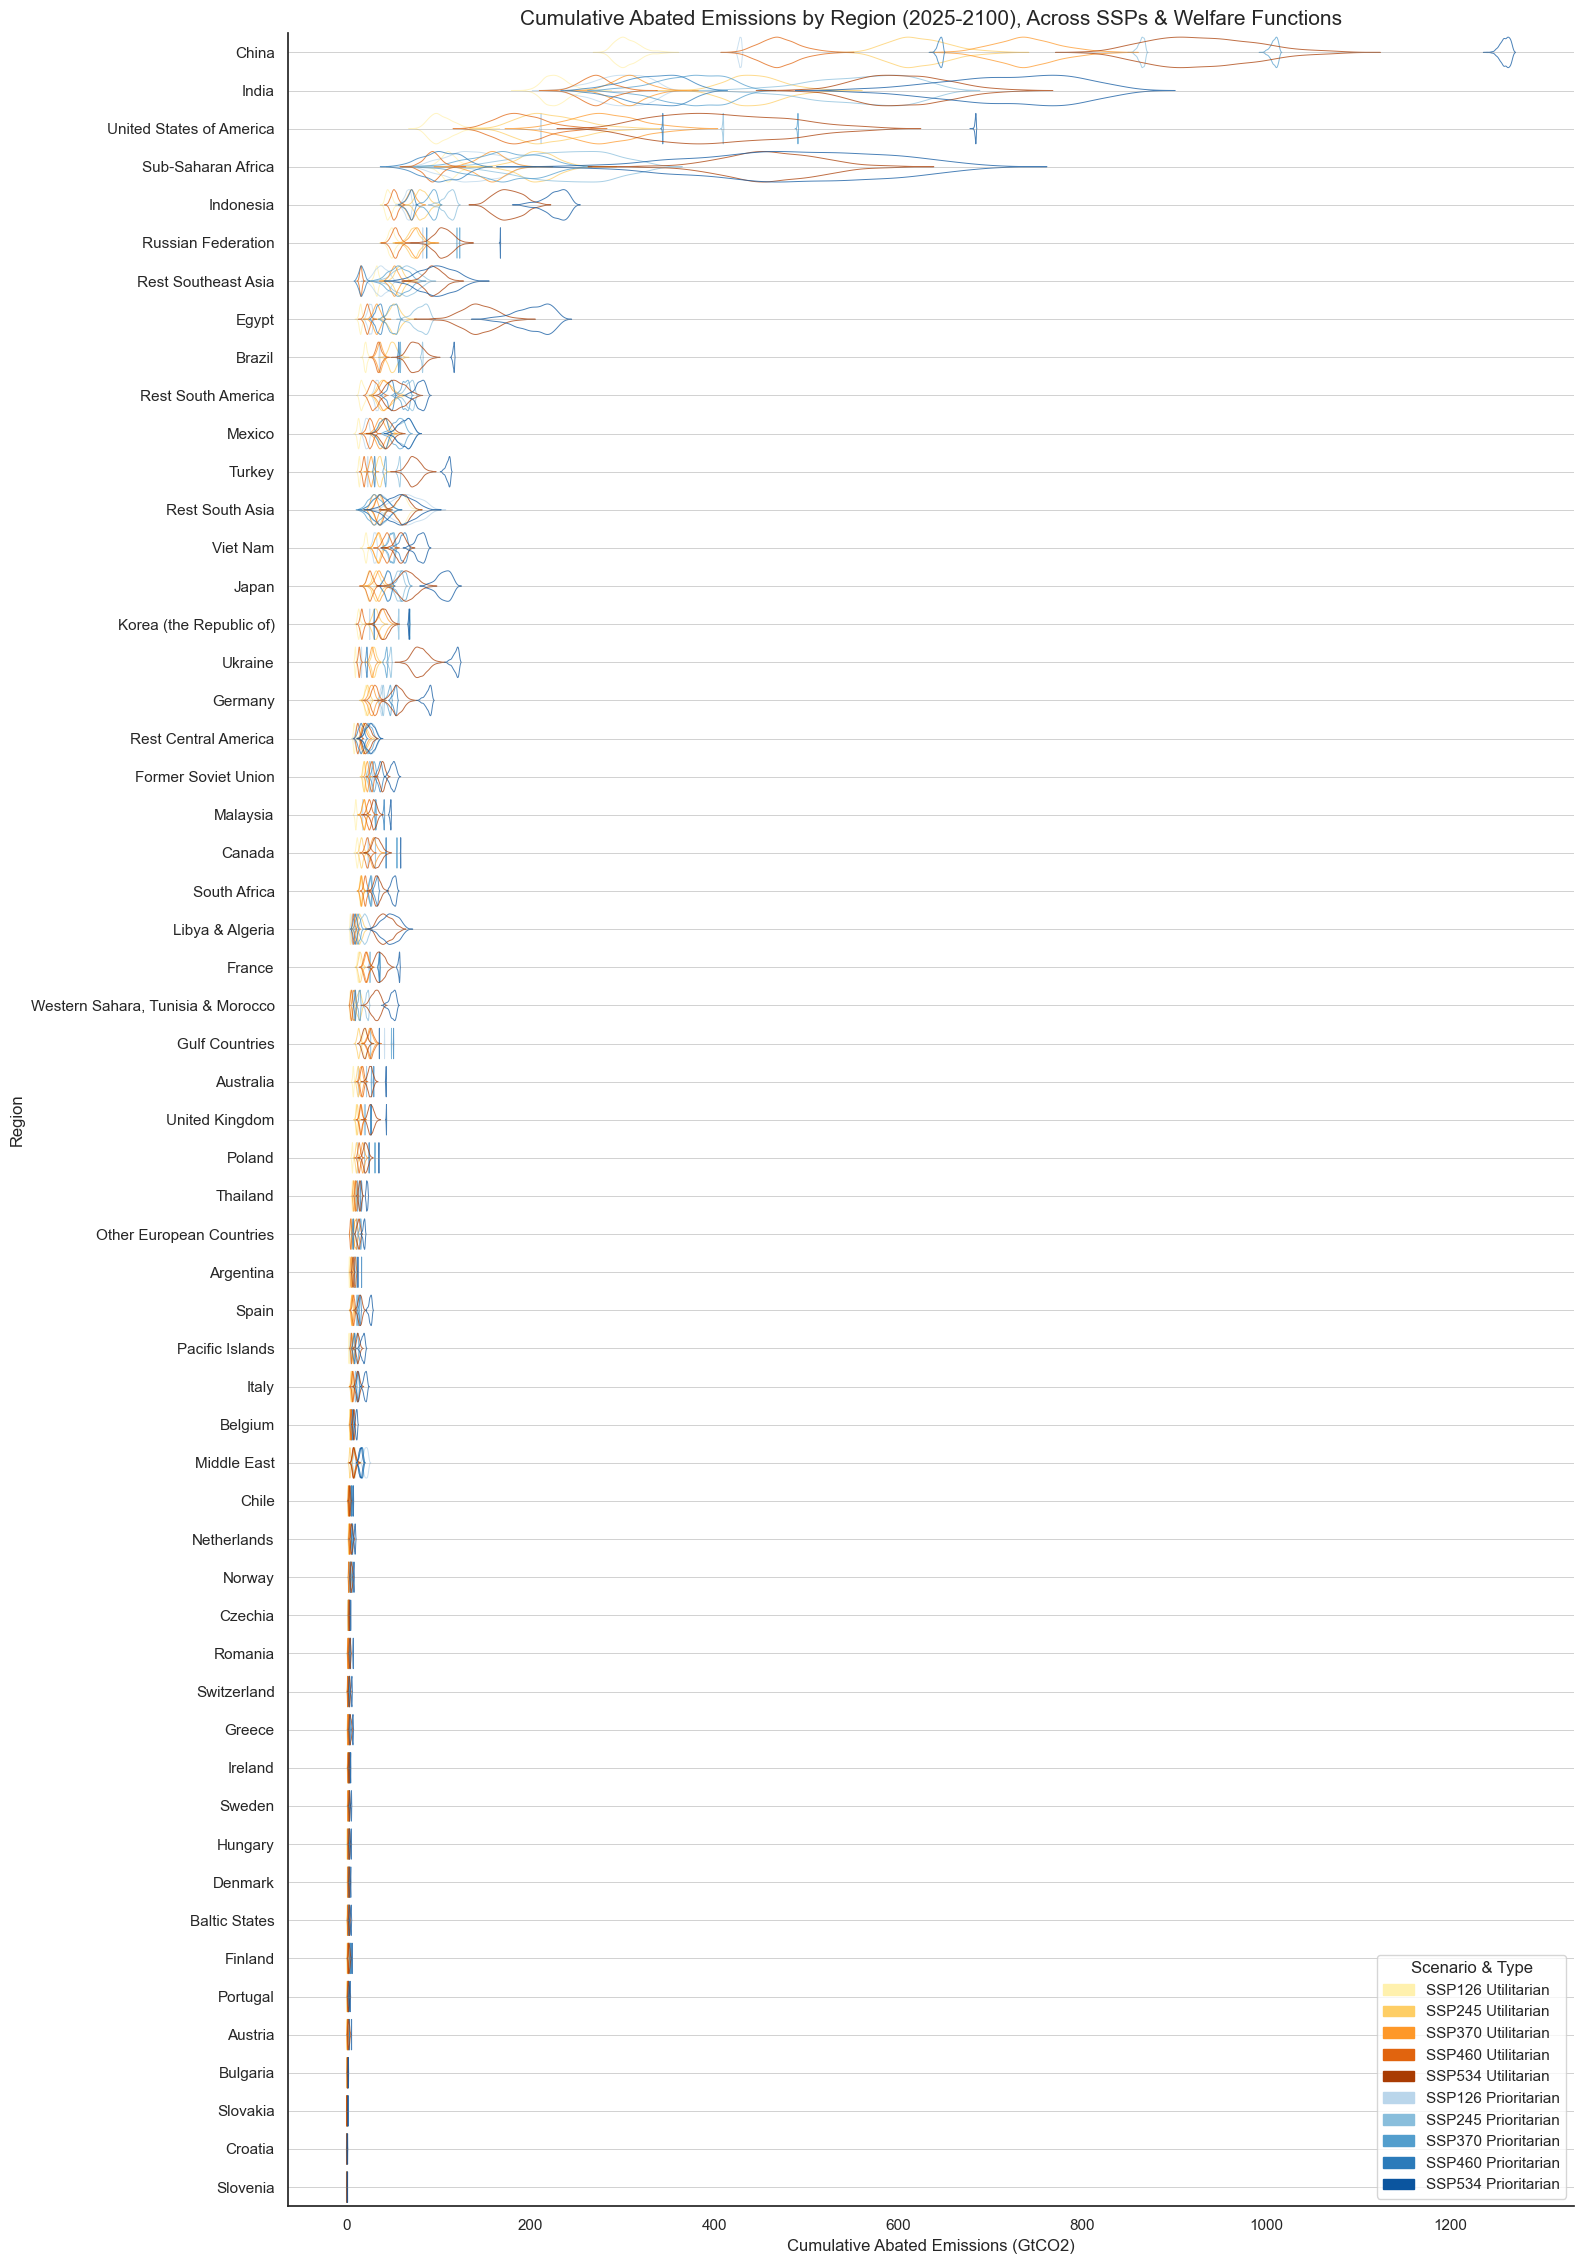

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.data_loader import DataLoader
from justice.util.model_time import TimeHorizon

data_loader = DataLoader()
region_list = data_loader.REGION_LIST
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)
list_of_years = time_horizon.model_time_horizon

slice_start_year = time_horizon.year_to_timestep(2025, time_horizon.timestep)
slice_end_year = time_horizon.year_to_timestep(2100, time_horizon.timestep)

# Path for all SSPs
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

ssp_codes = ["SSP126","SSP245","SSP370","SSP460","SSP534"]

# Load all baseline emissions (regions, years, 5 scenarios)
emissions_all_SSPs = np.load(path + "emissions_array_all_SSPs.npy")

# Load region name mapping
with open('data/input/rice50_region_names.json', 'r') as f:
    region_name_map = json.load(f)

def get_region_name(code):
    name = region_name_map.get(code, code)
    if isinstance(name, list):
        return name[0]
    return name

long_df = []

for ssp_idx, ssp_code in enumerate(ssp_codes):
    # Baseline emissions
    baseline_emissions = emissions_all_SSPs[:, :, ssp_idx]  # (regions, years)
    utilitarian_emissions = np.load(path + f"UTILITARIAN_emissions_idx29_{ssp_code}_emissions.npy")
    prioritarian_emissions = np.load(path + f"PRIORITARIAN_emissions_idx6_{ssp_code}_emissions.npy")
    n_samples = utilitarian_emissions.shape[2]
    baseline_emissions_exp = np.repeat(baseline_emissions[:, :, np.newaxis], n_samples, axis=2)
    abated_utilitarian = baseline_emissions_exp - utilitarian_emissions
    abated_prioritarian = baseline_emissions_exp - prioritarian_emissions
    abated_utilitarian = abated_utilitarian[:, slice_start_year:slice_end_year, :]
    abated_prioritarian = abated_prioritarian[:, slice_start_year:slice_end_year, :]
    cum_abated_utilitarian = np.sum(abated_utilitarian, axis=1)
    cum_abated_prioritarian = np.sum(abated_prioritarian, axis=1)
    for arr, typ in [
        (cum_abated_utilitarian, "Utilitarian"),
        (cum_abated_prioritarian, "Prioritarian")
    ]:
        tmp = pd.DataFrame(arr, index=region_list)
        tmp = tmp.melt(var_name='Sample', value_name='Cumulative Abated Emissions', ignore_index=False).reset_index()
        tmp['Region Name'] = tmp['index'].map(get_region_name)
        tmp['Type'] = typ
        tmp['SSP'] = ssp_code
        long_df.append(tmp[['Region Name', 'Cumulative Abated Emissions', 'Type', 'SSP']])

long_df = pd.concat(long_df, ignore_index=True)

# --- Sorting by highest utilitarian emissions under SSP245 ---
subset_util_ssp2 = long_df[(long_df['Type']=='Utilitarian') & (long_df['SSP']=='SSP245')]
utilitarian_means = subset_util_ssp2.groupby('Region Name')['Cumulative Abated Emissions'].mean()
sorted_region_names = utilitarian_means.sort_values(ascending=False).index.tolist()

# Make a 'PlotGroup' to encode (Type,SSP) for special coloring
long_df['PlotGroup'] = long_df['Type'] + "_" + long_df['SSP']

# --- Custom palette: orange-ish family for Utilitarian, blue-ish for Prioritarian ---
util_palette = sns.color_palette("YlOrBr", n_colors=5)
prio_palette = sns.color_palette("Blues", n_colors=6)[1:]  # skip very pale
palette = {}

for i, ssp_code in enumerate(ssp_codes):
    palette[f"Utilitarian_{ssp_code}"] = util_palette[i]
    palette[f"Prioritarian_{ssp_code}"] = prio_palette[i]

plt.figure(figsize=(16, max(10, 0.40*len(sorted_region_names))))
sns.violinplot(
    y="Region Name",
    x="Cumulative Abated Emissions",
    data=long_df,
    hue="PlotGroup",
    order=sorted_region_names,
    split=False,
    inner=None,
    linewidth=0.7,
    scale="width",
    dodge=False,
    palette=palette,
    alpha=0.74,
    fill=False,
)

# Custom legend
from matplotlib.patches import Patch

handles = []
for i, ssp_code in enumerate(ssp_codes):
    handles.append(Patch(color=util_palette[i], label=f"{ssp_code} Utilitarian"))
for i, ssp_code in enumerate(ssp_codes):
    handles.append(Patch(color=prio_palette[i], label=f"{ssp_code} Prioritarian"))

# Add lines for each region to separate the violins
for region in sorted_region_names:
    plt.axhline(y=region, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

plt.legend(handles=handles, title="Scenario & Type", loc="lower right", fontsize=11, title_fontsize=12)

plt.title("Cumulative Abated Emissions by Region (2025-2100), Across SSPs & Welfare Functions", fontsize=15)
plt.ylabel("Region")
plt.xlabel("Cumulative Abated Emissions (GtCO2)")
plt.yticks(rotation=0)
plt.tight_layout()
sns.despine()
plt.show()

Region Mapping Keys: dict_keys(['United States', 'India', 'China', 'Russia', 'Brazil', 'Other High Income', 'Europe', 'South Asia', 'Southeast Asia', 'Gulf Countries', 'Sub-Saharan Africa', 'Rest of the World'])
Selected Scenario: SSP126


/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/justice/util/visualizer.py:2794: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


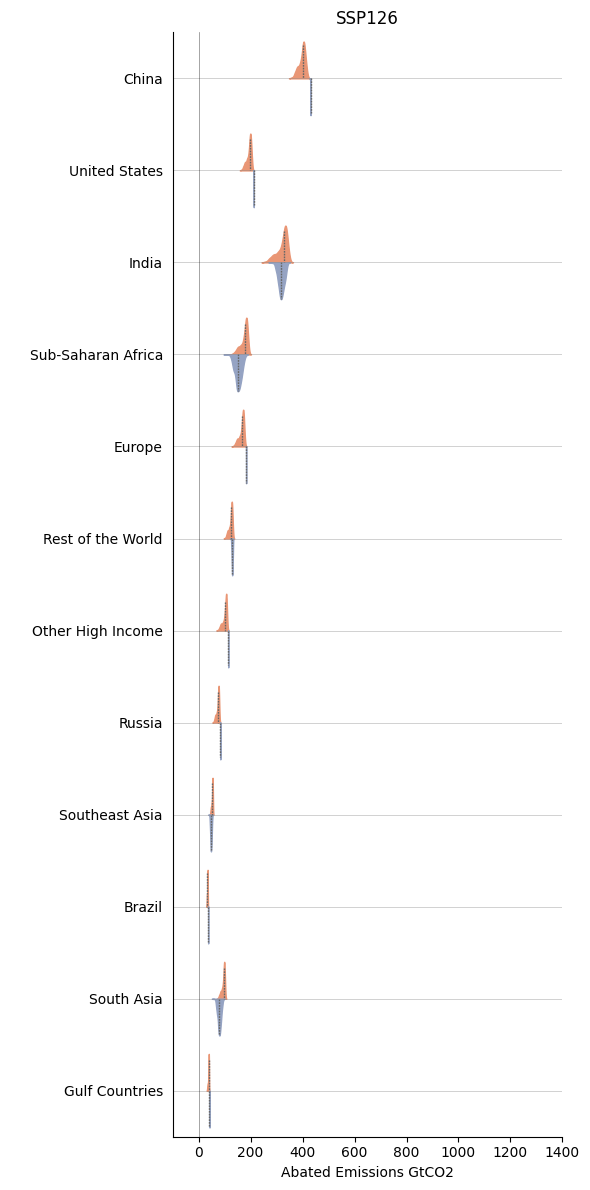

In [5]:
from justice.util.visualizer import plot_violin_comparison_sorted_all_SSPs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader
import json

from justice.util.enumerations import WelfareFunction, SSP



# Example usage

ssp = SSP.SSP3
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
scenario_index = 0  # This is the index of the scenario in the scenario_list
scenario_list=["SSP126","SSP245","SSP370","SSP460","SSP534"]
# Load the 13 regions mapping
region_map = json.load(open("data/input/12_regions.json", "r"))
# Print the keys of the region mapping
print("Region Mapping Keys:", region_map.keys())
regret_objective = "Temperature_Regret" # Temperature_Regret Welfare_Regret

plt, economic_dataframes = plot_violin_comparison_sorted_all_SSPs(
    baseline_path=path + "emissions_array_all_SSPs.npy",
    utilitarian_path= path + f"UTILITARIAN_emissions_idx3_{scenario_list[scenario_index]}_emissions.npy",
    prioritarian_path= path + f"PRIORITARIAN_emissions_idx2_{scenario_list[scenario_index]}_emissions.npy",
    region_mapping_path="data/input/12_regions.json",
    rice_region_dict_path="data/input/rice50_regions_dict.json",
    start_year=2015,
    end_year=2300,
    splice_start_year=2025,
    splice_end_year=2100,
    color_palette=['#fc8d62', '#8da0cb'],
    datanames=['Utilitarian', 'Prioritarian'],
    plot_title=f'{scenario_list[scenario_index]}',
    x_axis_title='Abated Emissions GtCO2',
    y_axis_title=' ',
    path_to_output= path + "plots",
    output_file_name=f"abated_emissions_utilitarian_vs_prioritarian_violin_{scenario_list[scenario_index]}" + regret_objective,
    saving=True,
    scenario_list=scenario_list,
    scenario_index=scenario_index,
    legend=False,
    data_range=(-100, 1400),  # Set the x-axis range from 0 to 1000
    region_order = ['China', 'United States', 'India', 'Sub-Saharan Africa', 'Europe', 'Rest of the World', 'Other High Income', 'Russia', 'Southeast Asia', 'Brazil', 'South Asia',  'Gulf Countries' ]
)

plt.show()



/var/folders/l1/cbpvtb4x2c38sfgzlzdply84c5jfvg/T/ipykernel_88271/4136087568.py:201: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.



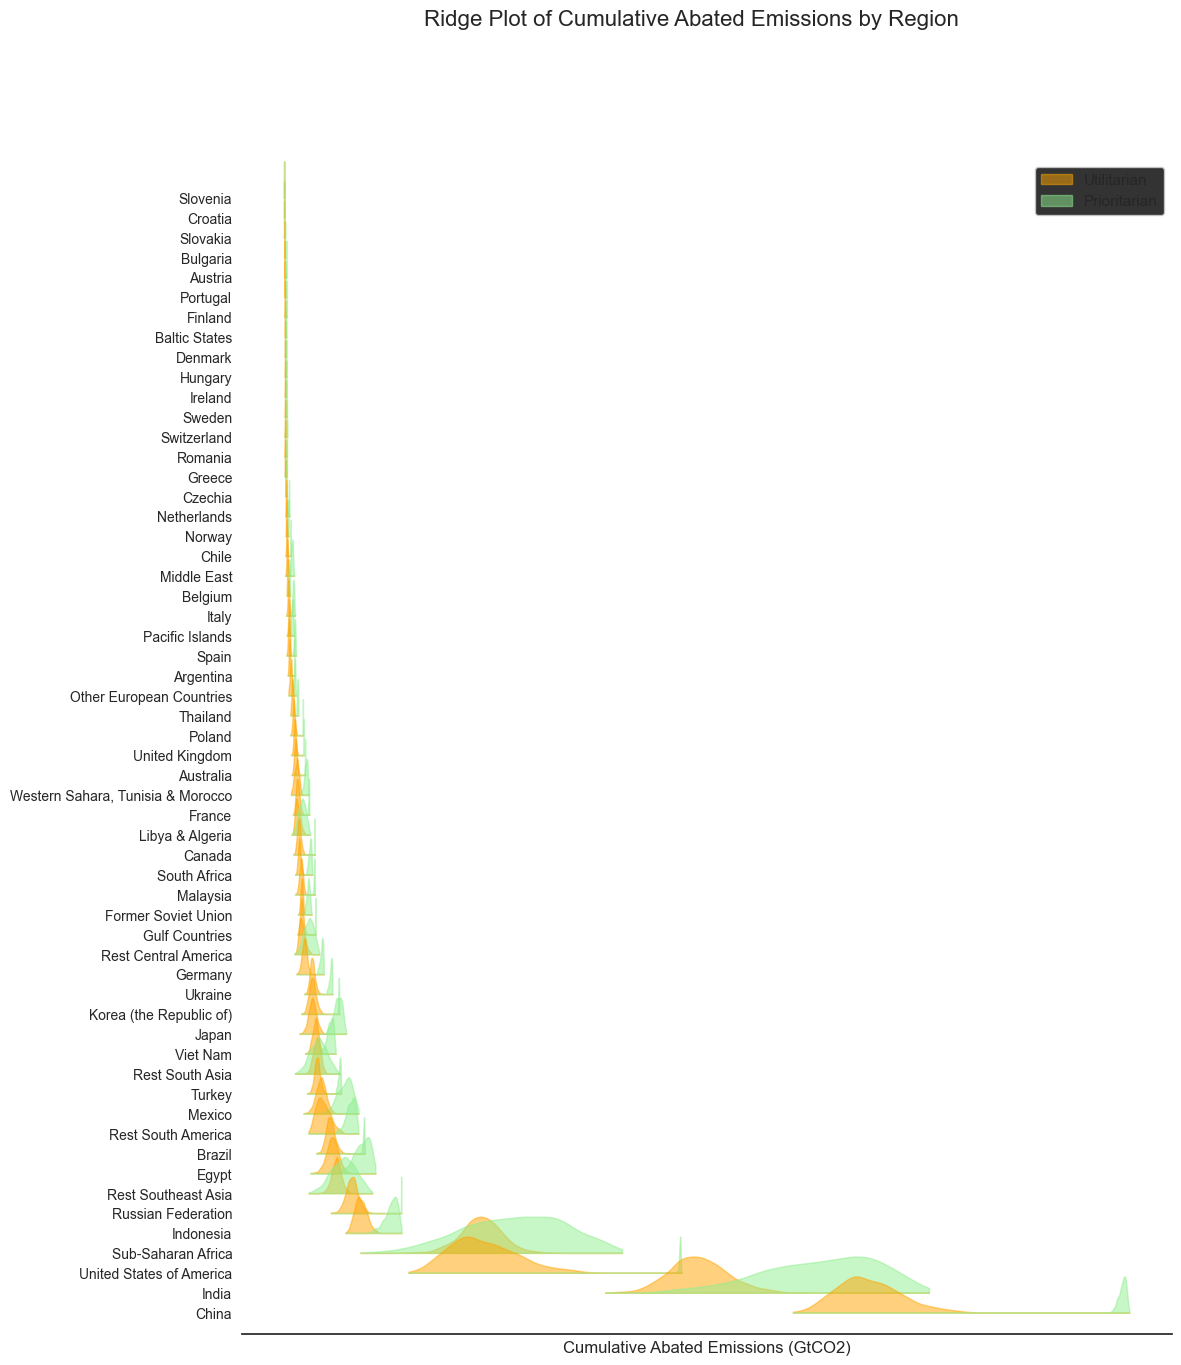

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.data_loader import DataLoader
from justice.util.model_time import TimeHorizon
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
from scipy import stats

data_loader = DataLoader()
region_list = data_loader.REGION_LIST
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon

ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

slice_start_year = time_horizon.year_to_timestep(2025, time_horizon.timestep)
slice_end_year = time_horizon.year_to_timestep(2100, time_horizon.timestep)

# Load the data
baseline_emissions = np.load(path + "baseline_emissions_16.npy")
utilitarian_emissions_SSP2 = np.load(path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy")
prioritarian_emissions_SSP2 = np.load(path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy")

abated_utilitarian_emissions_SSP2 = baseline_emissions - utilitarian_emissions_SSP2
abated_prioritarian_emissions_SSP2 = baseline_emissions - prioritarian_emissions_SSP2

# Slice the data for the years 2025 to 2100
abated_utilitarian_emissions_SSP2 = abated_utilitarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]
abated_prioritarian_emissions_SSP2 = abated_prioritarian_emissions_SSP2[:, slice_start_year:slice_end_year, :]

# Cumulative abated emissions over the years - sum across the time dimension to collapse it
cumulative_abated_utilitarian_emissions_SSP2 = np.sum(abated_utilitarian_emissions_SSP2, axis=1)
cumulative_abated_prioritarian_emissions_SSP2 = np.sum(abated_prioritarian_emissions_SSP2, axis=1)

# Add the region names as the index
cumulative_abated_utilitarian_emissions_df = pd.DataFrame(
    cumulative_abated_utilitarian_emissions_SSP2,
    index=region_list,
)

cumulative_abated_prioritarian_emissions_df = pd.DataFrame(
    cumulative_abated_prioritarian_emissions_SSP2,
    index=region_list,
)

# Reshape to long format
cumulative_abated_utilitarian_emissions_df = cumulative_abated_utilitarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_utilitarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)

cumulative_abated_prioritarian_emissions_df = cumulative_abated_prioritarian_emissions_df.melt(
    var_name='Region',
    value_name='Cumulative Abated Emissions',
    ignore_index=False
).reset_index()
cumulative_abated_prioritarian_emissions_df.rename(columns={'index': 'Sample'}, inplace=True)

# Drop the region column from the DataFrame
cumulative_abated_utilitarian_emissions_df.drop(columns=['Region'], inplace=True)
cumulative_abated_prioritarian_emissions_df.drop(columns=['Region'], inplace=True)

# Rename the columns 
cumulative_abated_utilitarian_emissions_df.rename(
    columns={'Sample': 'Sample Utilitarian', 'Cumulative Abated Emissions': 'Utilitarian Cumulative Abated Emissions'}, inplace=True
)
cumulative_abated_prioritarian_emissions_df.rename(
    columns={'Sample': 'Sample Prioritarian', 'Cumulative Abated Emissions': 'Prioritarian Cumulative Abated Emissions'}, inplace=True
)

# Combine into one DataFrame
cumulative_abated_emissions_df = pd.concat(
    [cumulative_abated_utilitarian_emissions_df, cumulative_abated_prioritarian_emissions_df],
    axis=1
)

# Load region name mapping
with open('data/input/rice50_region_names.json', 'r') as f:
    region_name_map = json.load(f)

# Helper to get readable region name (handles list or string)
def get_region_name(code):
    name = region_name_map.get(code, code)
    if isinstance(name, list):
        return name[0]
    return name

# Sorting: By highest to lowest mean utilitarian abated emissions (region codes, as before)
utilitarian_means = cumulative_abated_emissions_df.groupby('Sample Utilitarian')['Utilitarian Cumulative Abated Emissions'].mean()
sorted_region_list = utilitarian_means.sort_values(ascending=False).index.tolist()

# Map sorted region codes to region names
sorted_region_names = [get_region_name(code) for code in sorted_region_list]
# Map the DataFrame region codes to names for plotting
cumulative_abated_emissions_df['Region Utilitarian Name'] = cumulative_abated_emissions_df['Sample Utilitarian'].map(get_region_name)
cumulative_abated_emissions_df['Region Prioritarian Name'] = cumulative_abated_emissions_df['Sample Prioritarian'].map(get_region_name)

# ----- Create data for ridge plot -----
# Select top regions by mean emissions for clearer visualization
top_n = 57
top_regions = sorted_region_list[:top_n]
top_region_names = sorted_region_names[:top_n]

# Create a figure with more height to accommodate the ridge plot
fig, axes = plt.subplots(nrows=len(top_regions), ncols=1, figsize=(12, 15), sharex=True)

# Define overlap of density plots
overlap = 0.5
alpha = 0.5

# Colors for the two policy types
utilitarian_color = 'orange'
prioritarian_color = 'lightgreen'

# Generate ridge plots for each region
for i, region_code in enumerate(reversed(top_regions)):
    region_name = get_region_name(region_code)
    ax = axes[i]
    
    # Get data for this region
    util_data = cumulative_abated_emissions_df[
        cumulative_abated_emissions_df['Sample Utilitarian'] == region_code
    ]['Utilitarian Cumulative Abated Emissions']
    
    prio_data = cumulative_abated_emissions_df[
        cumulative_abated_emissions_df['Sample Prioritarian'] == region_code
    ]['Prioritarian Cumulative Abated Emissions']
    
    # Calculate the density curves
    util_density = stats.gaussian_kde(util_data)
    prio_density = stats.gaussian_kde(prio_data)
    
    # Define range for x values (using the combined range of both datasets)
    min_val = min(util_data.min(), prio_data.min())
    max_val = max(util_data.max(), prio_data.max())
    x = np.linspace(min_val, max_val, 1000)
    
    # Plot densities
    util_y = util_density(x)
    prio_y = prio_density(x)
    
    # Scale the densities
    util_y = util_y / util_y.max() * overlap
    prio_y = prio_y / prio_y.max() * overlap
    
    # Plot the densities
    ax.fill_between(x, util_y, alpha=alpha, color=utilitarian_color, label='Utilitarian' if i == 0 else "")
    ax.fill_between(x, prio_y, alpha=alpha, color=prioritarian_color, label='Prioritarian' if i == 0 else "")
    
    # Add region name on the left
    ax.text(-0.01, 0.0, region_name, horizontalalignment='right',
            verticalalignment='center', transform=ax.transAxes, fontsize=10)
    
    # Remove y-axis ticks and labels
    ax.set_yticks([])
    ax.set_ylabel('')
    
    # Remove top, right, and left spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Show x-axis ticks only on bottom plot and push the axis down
    if i < len(top_regions) - 1:
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
    else:
        ax.spines['bottom'].set_visible(True)
        ax.xaxis.set_ticks_position('bottom')
        # Move the x-axis further below the plot
        ax.spines['bottom'].set_position(('axes', -0.5))
    
# Add legend to the top plot
axes[0].legend(loc='upper right')

# Add x-axis label to the bottom plot
axes[-1].set_xlabel('Cumulative Abated Emissions (GtCO2)')

# Add title
plt.suptitle('Ridge Plot of Cumulative Abated Emissions by Region', fontsize=16, y=0.98)

plt.tight_layout()
plt.subplots_adjust(hspace=-0.5)  # Adjust overlap between plots
plt.show()